In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import train


In [2]:
dfList = train.transform()
#df.shape

In [3]:
df1List = dfList
dfList = df1List
for df in dfList:
    scaler = MinMaxScaler(feature_range=(0,1)).fit(df)
    df = scaler.transform(df)
#print(dfList[12])
#df.head(5)

In [4]:
def eval(accList, precisionList, tprList, farList, frrList, y, y_pred):
    avgaccuracy = 0
    avgPrecision = 0
    avgTpr = 0
    avgFar = 0
    avgFrr = 0
    for i in range(len(accList)):
        avgaccuracy += accList[i]
        avgPrecision += precisionList[i]
        avgTpr += tprList[i]
        avgFar += farList[i]
        avgFrr += frrList[i]
    avgaccuracy = avgaccuracy / len(accList)
    avgPrecision = avgPrecision / len(precisionList)
    avgTpr = avgTpr / len(tprList)
    avgFar = avgFar / len(farList)
    avgFrr = avgFrr / len(frrList)
    
    fprROC, tprROC, threshold = roc_curve(y, y_pred, pos_label=1) #fprROC == avgFar, tprROC == avgTpr
    fnrROC = 1 - tprROC #fnrROC == avgFrr
    EER = fprROC[np.nanargmin(np.absolute((fnrROC - fprROC)))]

    print("average acc = "+str(avgaccuracy))
    print("average precision = "+str(avgPrecision))
    print("average TPR = "+str(avgTpr))
    print("average FAR = "+str(avgFar))
    print("average FRR = "+str(avgFrr))
    print("average EER = "+str(EER))

In [ ]:
import pickle
#i=0
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set

    #print(pd.Series(y_train).value_counts())
    #print(pd.Series(y_test).value_counts())

    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    #print(pd.Series(y_re).value_counts())
    
    model = svm.SVC(kernel='rbf', C=10)

    model.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
    y_pred = model.predict(X_test)

    #print(f"model{i} train score: " + str(model.score(X_re, y_re)))
    #print(f"model{i} test score: " + str(model.score(X_test, y_test.astype('int'))))
    
    #pickle.dump(model,open(f'./models/model{i}.pkl','wb'))
    acc = cross_val_score(model, X_train, y_train.astype('int'), cv=5, scoring='accuracy')
    #print(acc)
    #print(acc.mean()*100, '%')
    #i+=1
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
eval(accList, precisionList, tprList, farList, frrList, y_test.astype('int'), y_pred)


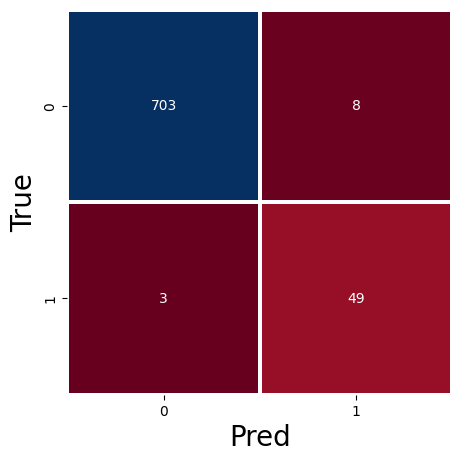

acc = 0.9855832241153342
precision = 0.8596491228070176
TPR = 0.9423076923076923
FAR = 0.011251758087201125
FRR = 0.057692307692307696


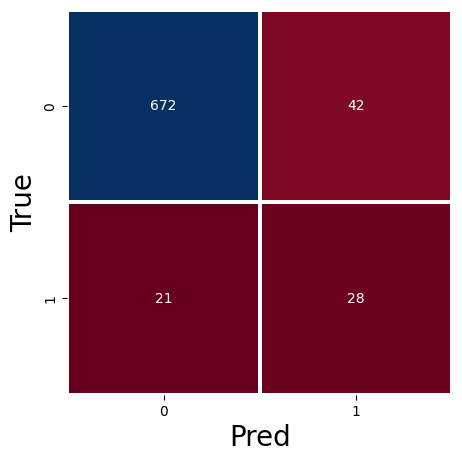

acc = 0.9174311926605505
precision = 0.4
TPR = 0.5714285714285714
FAR = 0.058823529411764705
FRR = 0.42857142857142855


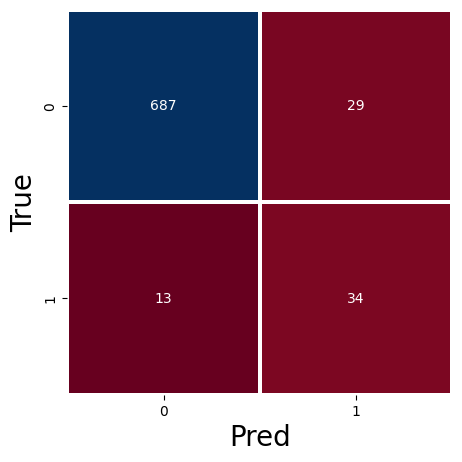

acc = 0.944954128440367
precision = 0.5396825396825397
TPR = 0.723404255319149
FAR = 0.040502793296089384
FRR = 0.2765957446808511


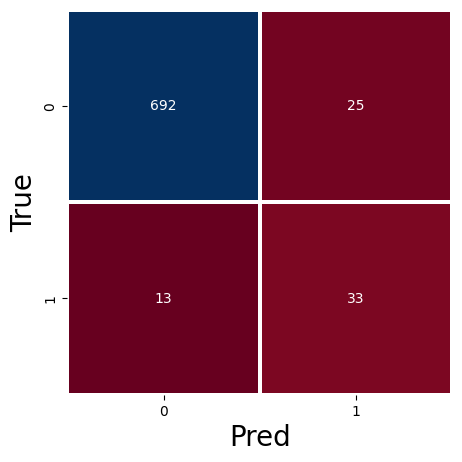

acc = 0.9501965923984272
precision = 0.5689655172413793
TPR = 0.717391304347826
FAR = 0.03486750348675035
FRR = 0.2826086956521739


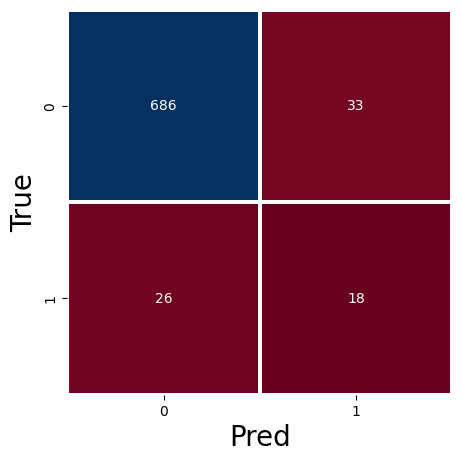

acc = 0.9226736566186108
precision = 0.35294117647058826
TPR = 0.4090909090909091
FAR = 0.0458970792767733
FRR = 0.5909090909090909


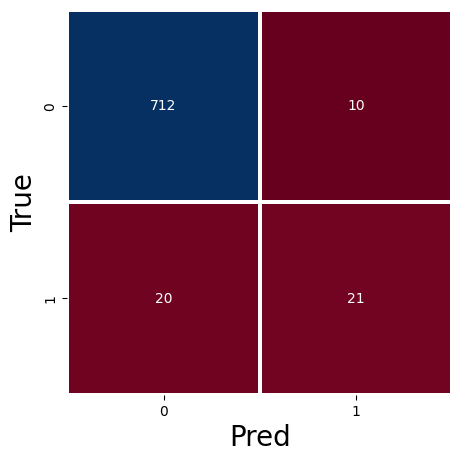

acc = 0.9606815203145478
precision = 0.6774193548387096
TPR = 0.5121951219512195
FAR = 0.013850415512465374
FRR = 0.4878048780487805


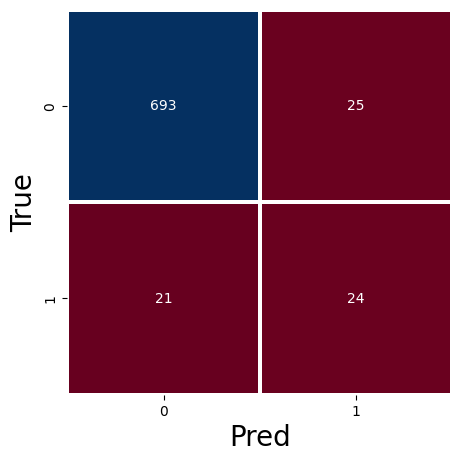

acc = 0.9397116644823067
precision = 0.4897959183673469
TPR = 0.5333333333333333
FAR = 0.034818941504178275
FRR = 0.4666666666666667


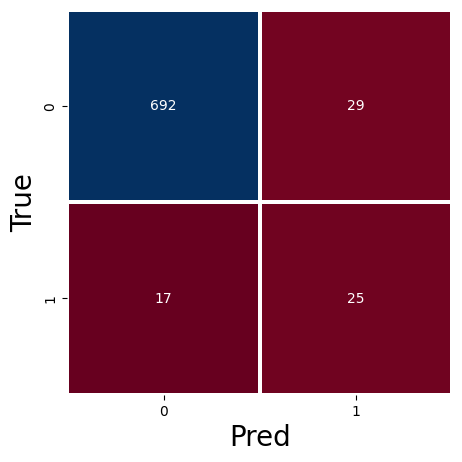

acc = 0.9397116644823067
precision = 0.46296296296296297
TPR = 0.5952380952380952
FAR = 0.04022191400832178
FRR = 0.40476190476190477


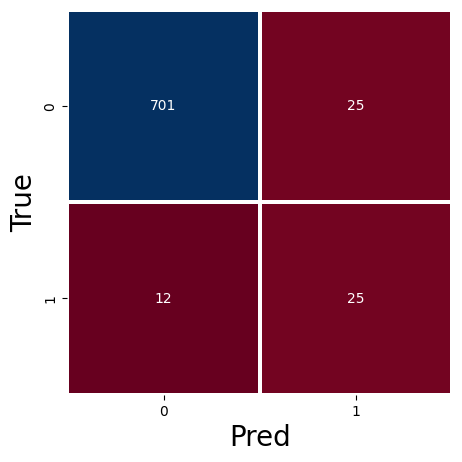

acc = 0.9515072083879423
precision = 0.5
TPR = 0.6756756756756757
FAR = 0.03443526170798898
FRR = 0.32432432432432434


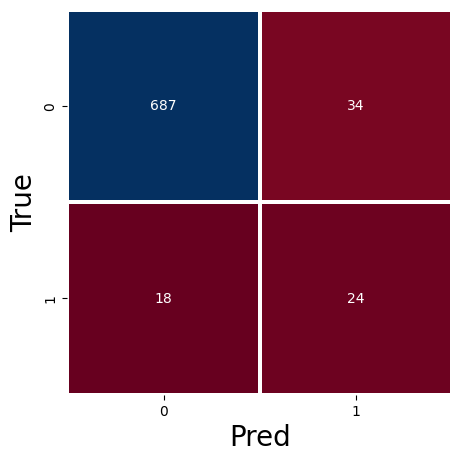

acc = 0.9318479685452162
precision = 0.41379310344827586
TPR = 0.5714285714285714
FAR = 0.047156726768377254
FRR = 0.42857142857142855


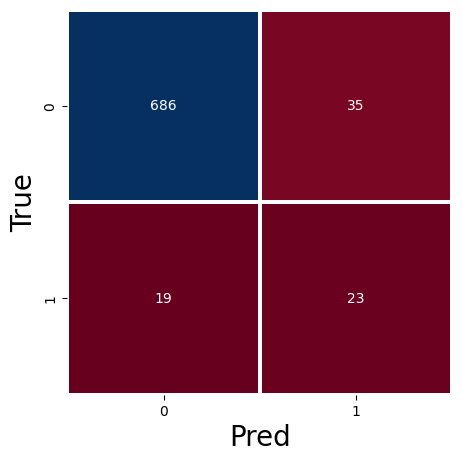

acc = 0.9292267365661862
precision = 0.39655172413793105
TPR = 0.5476190476190477
FAR = 0.04854368932038835
FRR = 0.4523809523809524


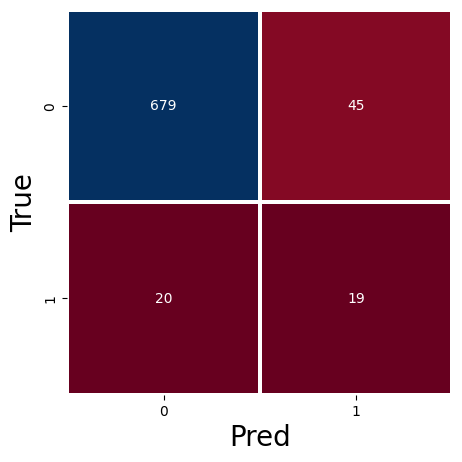

acc = 0.9148099606815203
precision = 0.296875
TPR = 0.48717948717948717
FAR = 0.062154696132596686
FRR = 0.5128205128205128


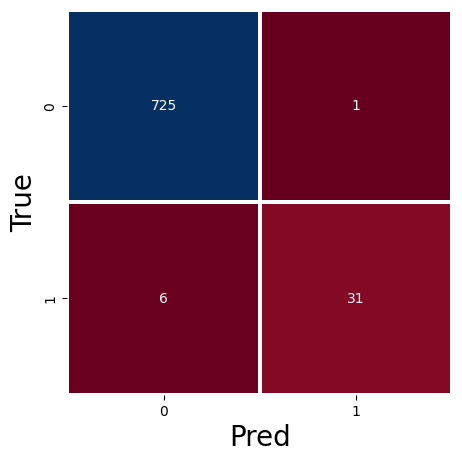

acc = 0.9908256880733946
precision = 0.96875
TPR = 0.8378378378378378
FAR = 0.0013774104683195593
FRR = 0.16216216216216217


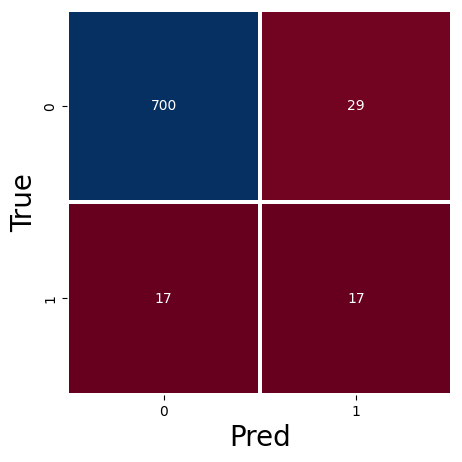

acc = 0.9397116644823067
precision = 0.3695652173913043
TPR = 0.5
FAR = 0.039780521262002745
FRR = 0.5


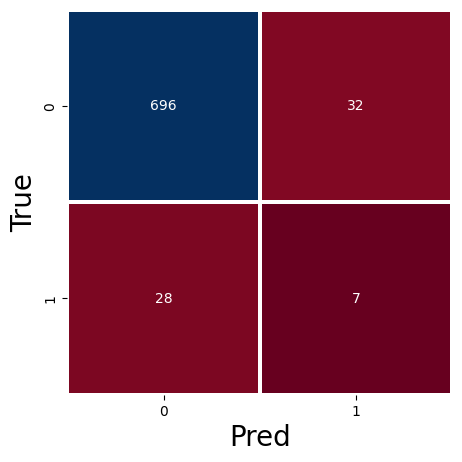

acc = 0.9213630406290957
precision = 0.1794871794871795
TPR = 0.2
FAR = 0.04395604395604396
FRR = 0.8


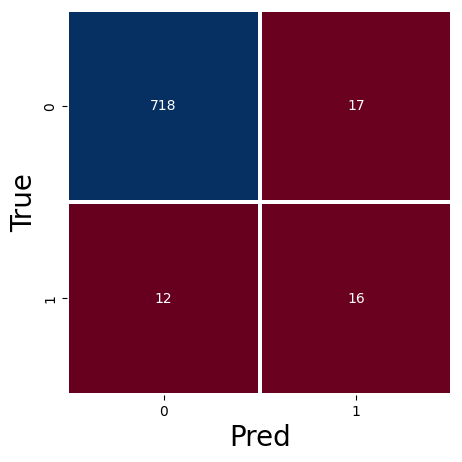

acc = 0.9619921363040629
precision = 0.48484848484848486
TPR = 0.5714285714285714
FAR = 0.02312925170068027
FRR = 0.42857142857142855


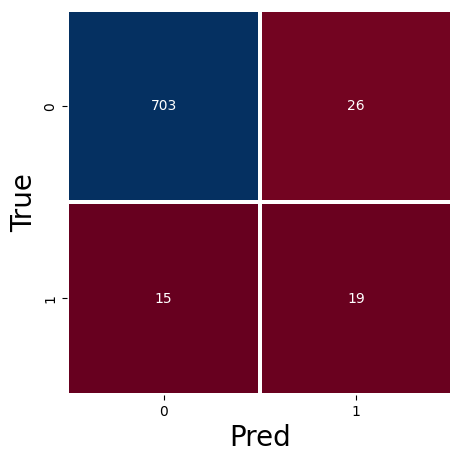

acc = 0.9462647444298821
precision = 0.4222222222222222
TPR = 0.5588235294117647
FAR = 0.03566529492455418
FRR = 0.4411764705882353


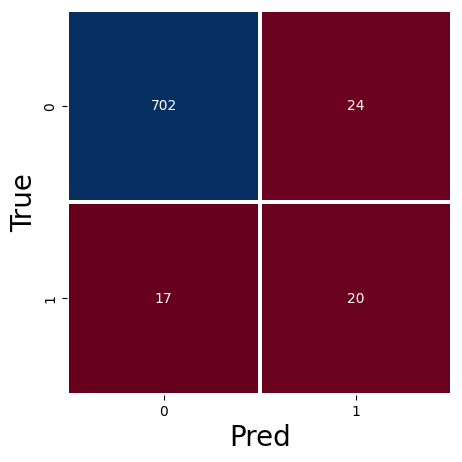

acc = 0.9462647444298821
precision = 0.45454545454545453
TPR = 0.5405405405405406
FAR = 0.03305785123966942
FRR = 0.4594594594594595


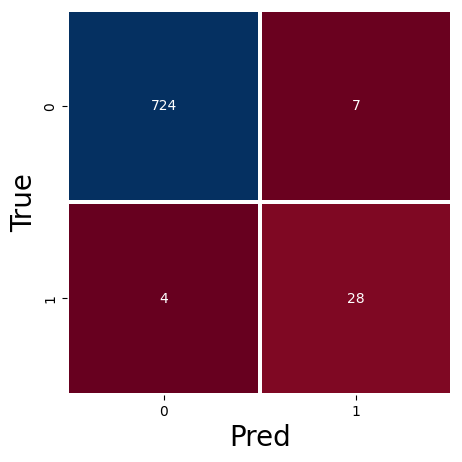

acc = 0.9855832241153342
precision = 0.8
TPR = 0.875
FAR = 0.009575923392612859
FRR = 0.125
average acc = 0.946333724218804
average precision = 0.507266051497442
average TPR = 0.5984169760072785
average FAR = 0.03468771607667255
average FRR = 0.40158302399272144
average EER = 0.009575923392612859


In [6]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_re,y_re)
    
    y_pred = knn.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, y_test.astype('int'), y_pred)

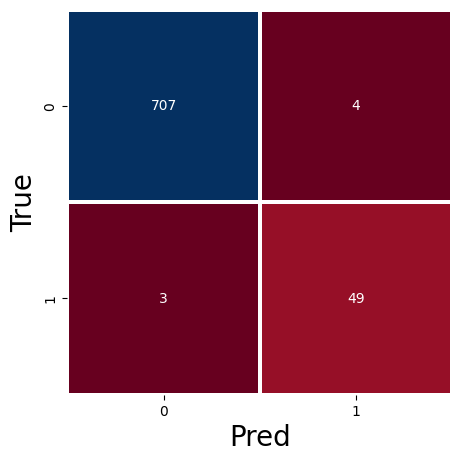

acc = 0.9908256880733946
precision = 0.9245283018867925
TPR = 0.9423076923076923
FAR = 0.005625879043600563
FRR = 0.057692307692307696


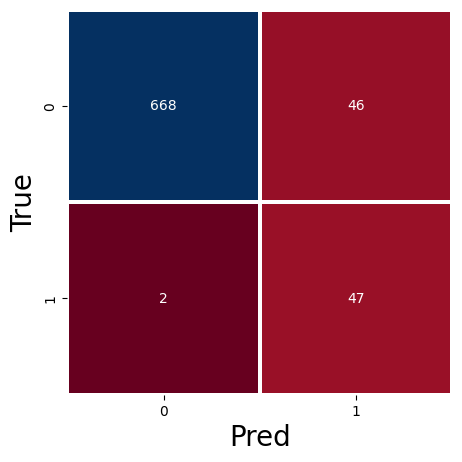

acc = 0.9370904325032765
precision = 0.5053763440860215
TPR = 0.9591836734693877
FAR = 0.06442577030812324
FRR = 0.04081632653061224


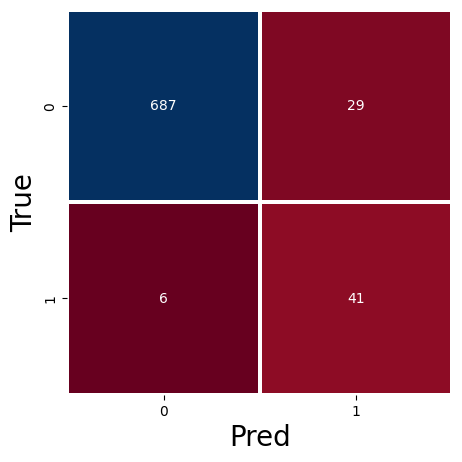

acc = 0.9541284403669725
precision = 0.5857142857142857
TPR = 0.8723404255319149
FAR = 0.040502793296089384
FRR = 0.1276595744680851


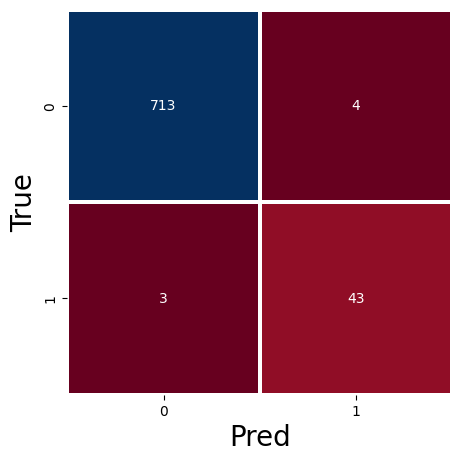

acc = 0.9908256880733946
precision = 0.9148936170212766
TPR = 0.9347826086956522
FAR = 0.005578800557880056
FRR = 0.06521739130434782


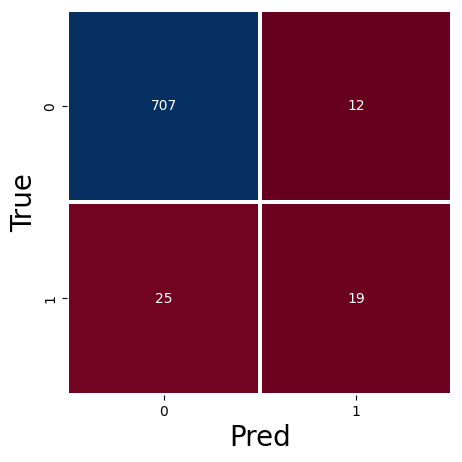

acc = 0.9515072083879423
precision = 0.6129032258064516
TPR = 0.4318181818181818
FAR = 0.016689847009735744
FRR = 0.5681818181818182


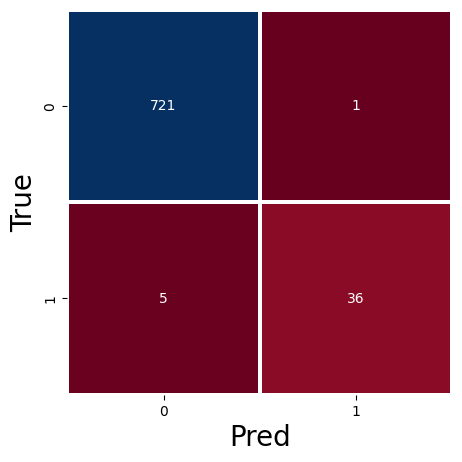

acc = 0.9921363040629095
precision = 0.972972972972973
TPR = 0.8780487804878049
FAR = 0.0013850415512465374
FRR = 0.12195121951219512


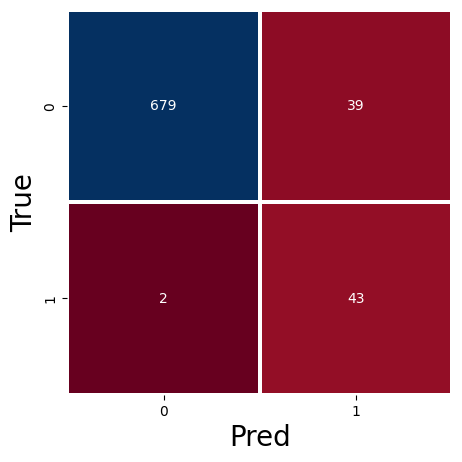

acc = 0.9462647444298821
precision = 0.524390243902439
TPR = 0.9555555555555556
FAR = 0.054317548746518104
FRR = 0.044444444444444446


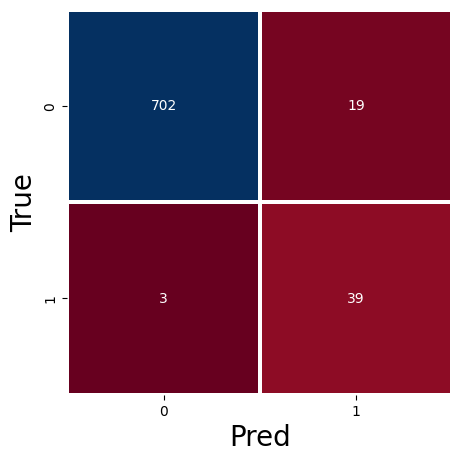

acc = 0.9711664482306684
precision = 0.6724137931034483
TPR = 0.9285714285714286
FAR = 0.026352288488210817
FRR = 0.07142857142857142


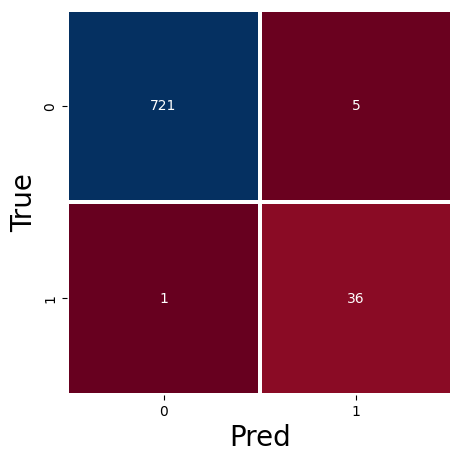

acc = 0.9921363040629095
precision = 0.8780487804878049
TPR = 0.972972972972973
FAR = 0.006887052341597796
FRR = 0.02702702702702703


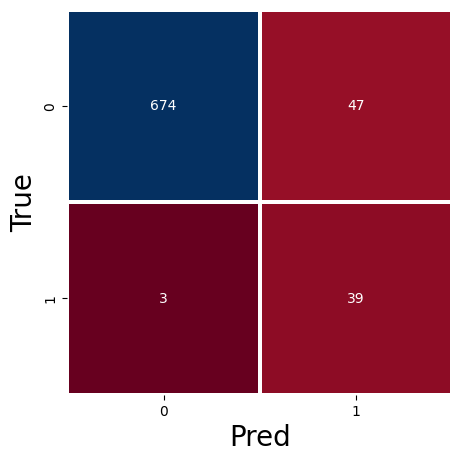

acc = 0.9344692005242464
precision = 0.45348837209302323
TPR = 0.9285714285714286
FAR = 0.0651872399445215
FRR = 0.07142857142857142


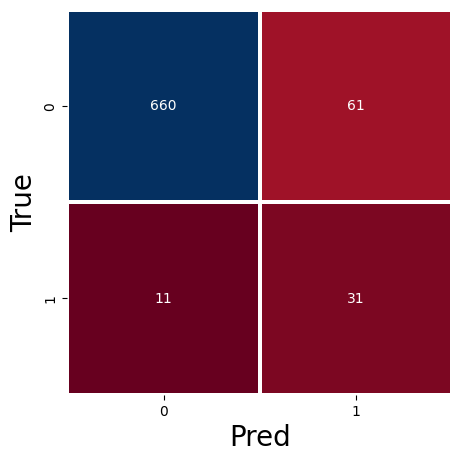

acc = 0.9056356487549148
precision = 0.33695652173913043
TPR = 0.7380952380952381
FAR = 0.08460471567267684
FRR = 0.2619047619047619


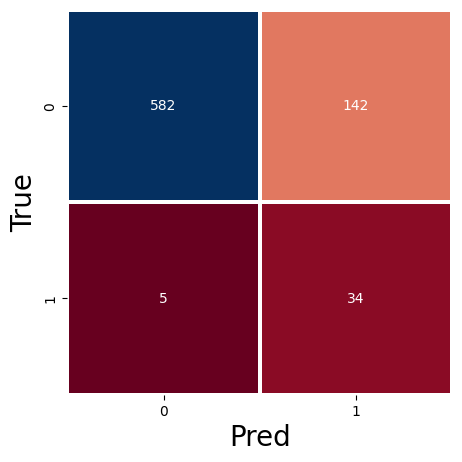

acc = 0.8073394495412844
precision = 0.19318181818181818
TPR = 0.8717948717948718
FAR = 0.19613259668508287
FRR = 0.1282051282051282


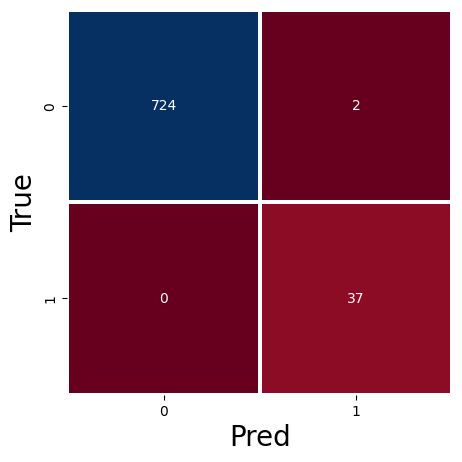

acc = 0.9973787680209698
precision = 0.9487179487179487
TPR = 1.0
FAR = 0.0027548209366391185
FRR = 0.0


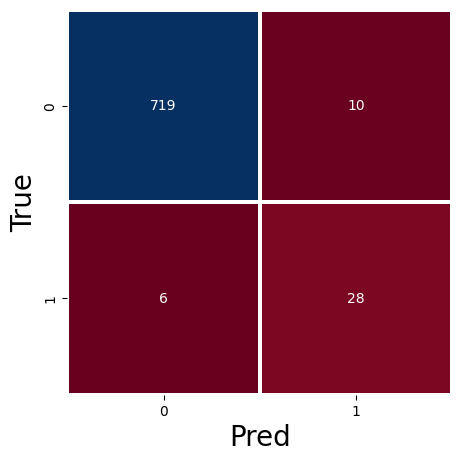

acc = 0.9790301441677588
precision = 0.7368421052631579
TPR = 0.8235294117647058
FAR = 0.013717421124828532
FRR = 0.17647058823529413


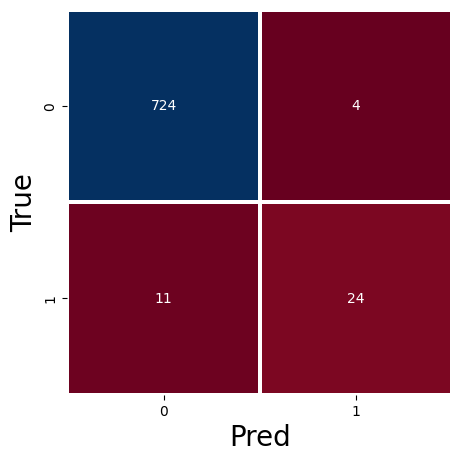

acc = 0.9803407601572739
precision = 0.8571428571428571
TPR = 0.6857142857142857
FAR = 0.005494505494505495
FRR = 0.3142857142857143


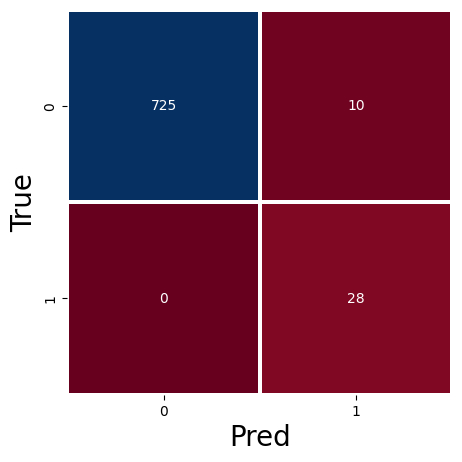

acc = 0.9868938401048493
precision = 0.7368421052631579
TPR = 1.0
FAR = 0.013605442176870748
FRR = 0.0


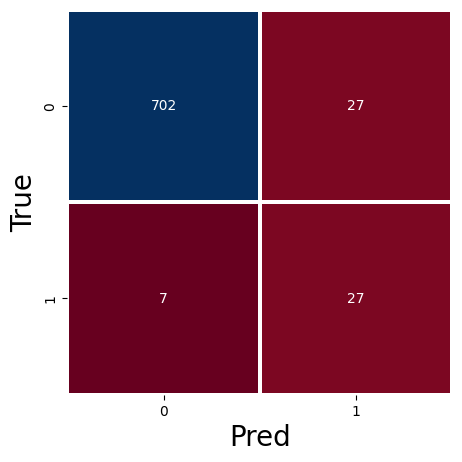

acc = 0.9554390563564875
precision = 0.5
TPR = 0.7941176470588235
FAR = 0.037037037037037035
FRR = 0.20588235294117646


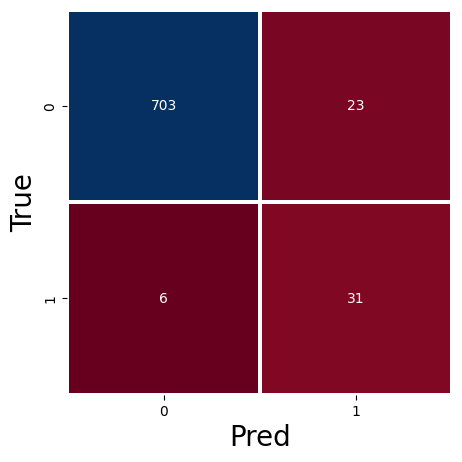

acc = 0.9619921363040629
precision = 0.5740740740740741
TPR = 0.8378378378378378
FAR = 0.03168044077134986
FRR = 0.16216216216216217


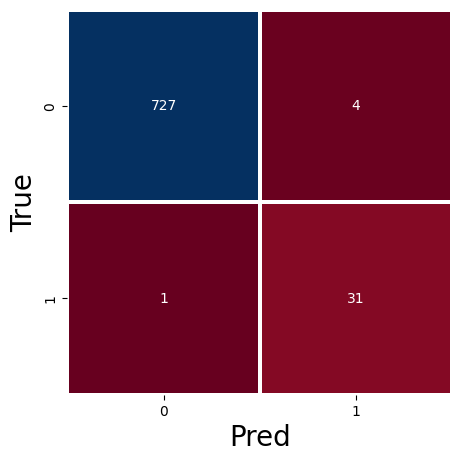

acc = 0.9934469200524246
precision = 0.8857142857142857
TPR = 0.96875
FAR = 0.005471956224350205
FRR = 0.03125
average acc = 0.9593709043250326
average precision = 0.6744316659563656
average TPR = 0.8696837915919886
average FAR = 0.035655326179519185
average FRR = 0.13031620840801147
average EER = 0.005471956224350205


In [7]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    MLP = MLPClassifier(hidden_layer_sizes=(100,10))
    MLP.fit(X_re,y_re)
    
    y_pred = MLP.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, y_test.astype('int'), y_pred)

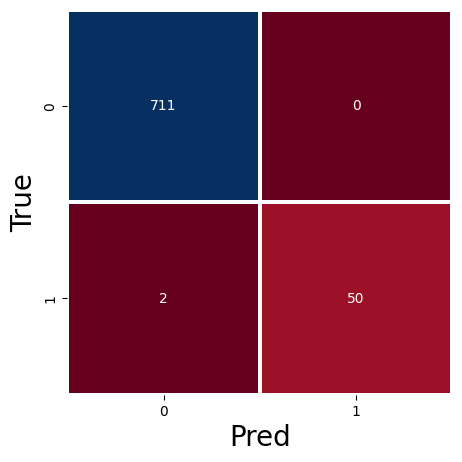

acc = 0.9973787680209698
precision = 1.0
TPR = 0.9615384615384616
FAR = 0.0
FRR = 0.038461538461538464


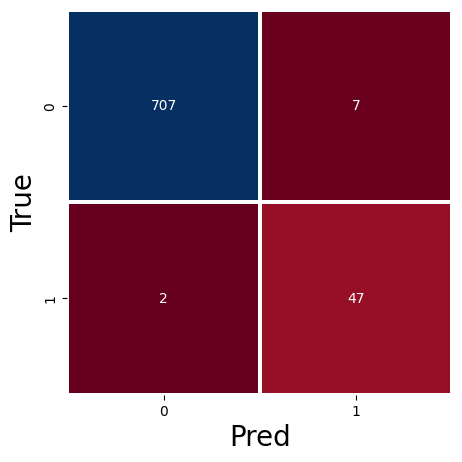

acc = 0.9882044560943644
precision = 0.8703703703703703
TPR = 0.9591836734693877
FAR = 0.00980392156862745
FRR = 0.04081632653061224


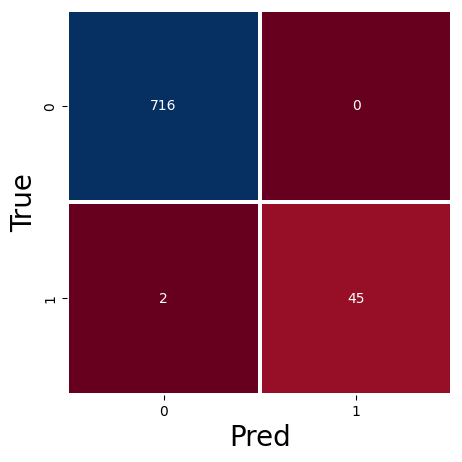

acc = 0.9973787680209698
precision = 1.0
TPR = 0.9574468085106383
FAR = 0.0
FRR = 0.0425531914893617


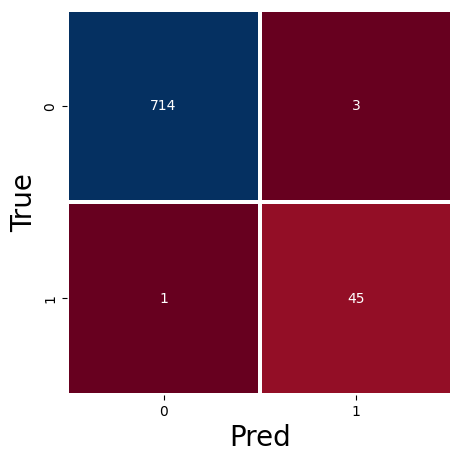

acc = 0.9947575360419397
precision = 0.9375
TPR = 0.9782608695652174
FAR = 0.0041841004184100415
FRR = 0.021739130434782608


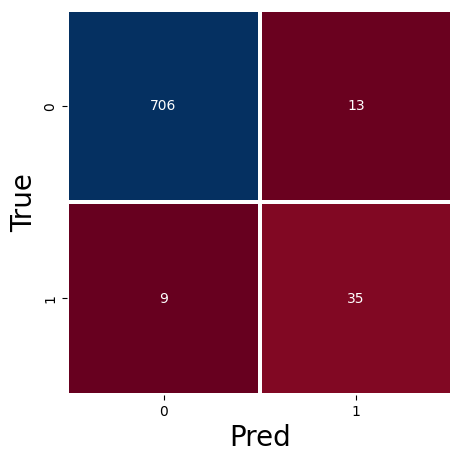

acc = 0.9711664482306684
precision = 0.7291666666666666
TPR = 0.7954545454545454
FAR = 0.01808066759388039
FRR = 0.20454545454545456


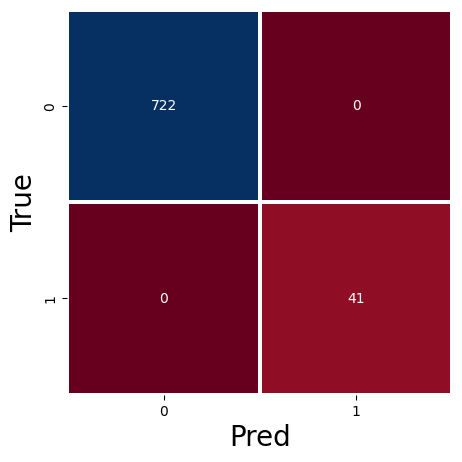

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


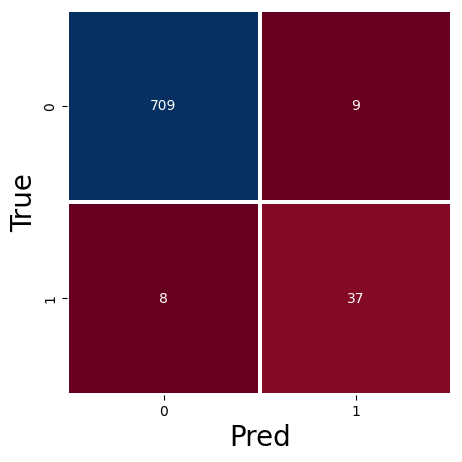

acc = 0.9777195281782438
precision = 0.8043478260869565
TPR = 0.8222222222222222
FAR = 0.012534818941504178
FRR = 0.17777777777777778


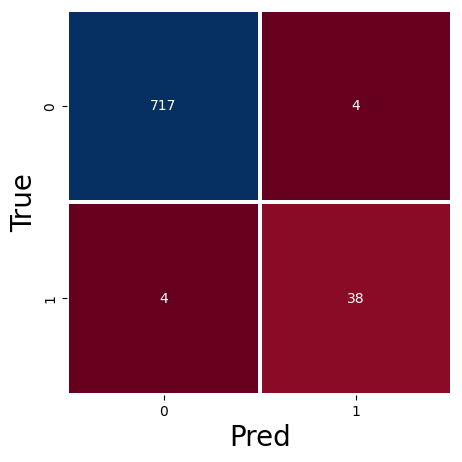

acc = 0.9895150720838795
precision = 0.9047619047619048
TPR = 0.9047619047619048
FAR = 0.005547850208044383
FRR = 0.09523809523809523


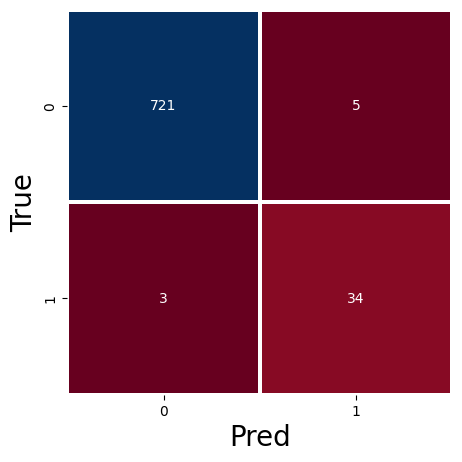

acc = 0.9895150720838795
precision = 0.8717948717948718
TPR = 0.918918918918919
FAR = 0.006887052341597796
FRR = 0.08108108108108109


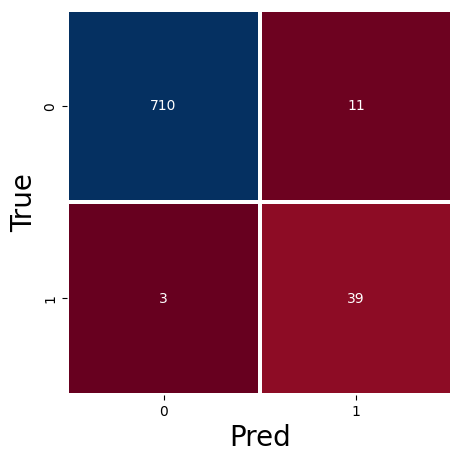

acc = 0.981651376146789
precision = 0.78
TPR = 0.9285714285714286
FAR = 0.015256588072122053
FRR = 0.07142857142857142


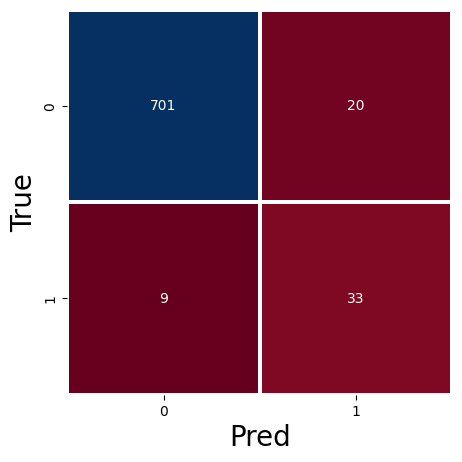

acc = 0.9619921363040629
precision = 0.6226415094339622
TPR = 0.7857142857142857
FAR = 0.027739251040221916
FRR = 0.21428571428571427


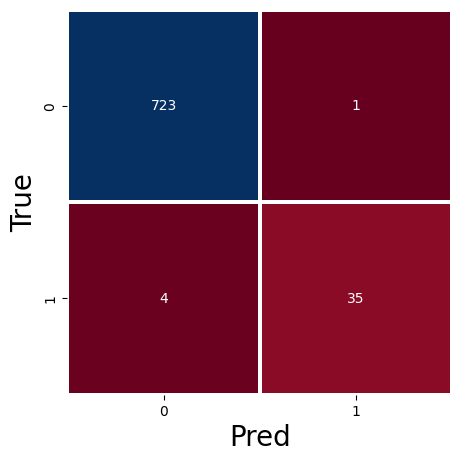

acc = 0.9934469200524246
precision = 0.9722222222222222
TPR = 0.8974358974358975
FAR = 0.0013812154696132596
FRR = 0.10256410256410256


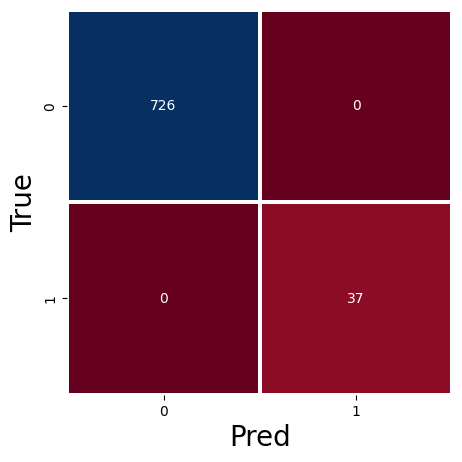

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


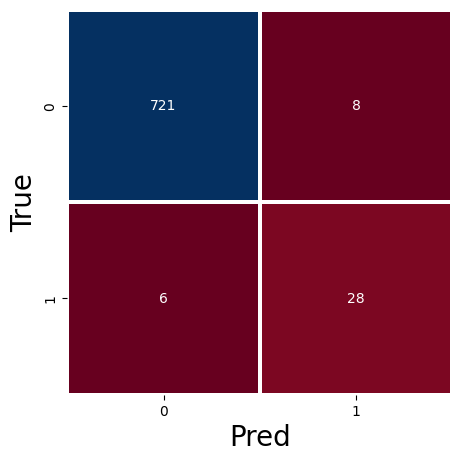

acc = 0.981651376146789
precision = 0.7777777777777778
TPR = 0.8235294117647058
FAR = 0.010973936899862825
FRR = 0.17647058823529413


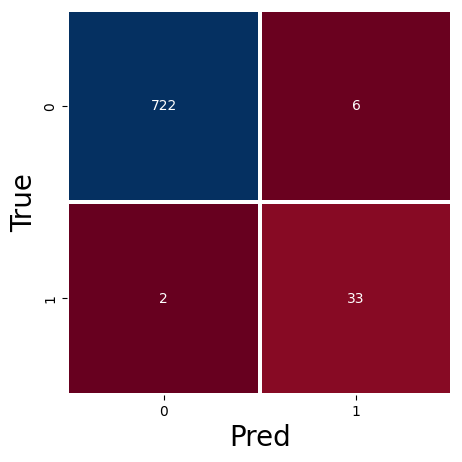

acc = 0.9895150720838795
precision = 0.8461538461538461
TPR = 0.9428571428571428
FAR = 0.008241758241758242
FRR = 0.05714285714285714


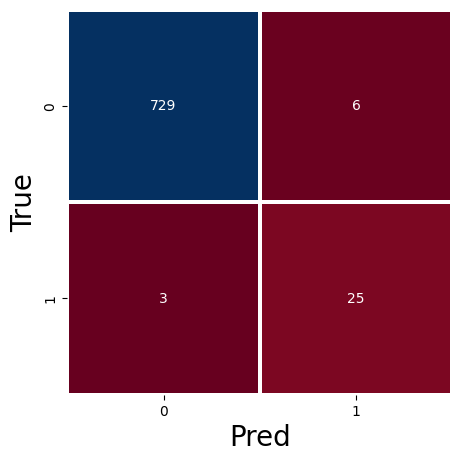

acc = 0.9882044560943644
precision = 0.8064516129032258
TPR = 0.8928571428571429
FAR = 0.00816326530612245
FRR = 0.10714285714285714


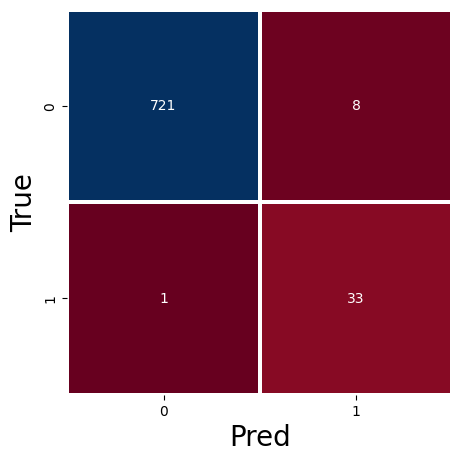

acc = 0.9882044560943644
precision = 0.8048780487804879
TPR = 0.9705882352941176
FAR = 0.010973936899862825
FRR = 0.029411764705882353


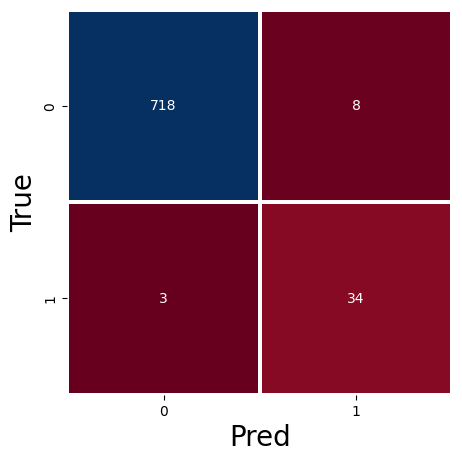

acc = 0.9855832241153342
precision = 0.8095238095238095
TPR = 0.918918918918919
FAR = 0.011019283746556474
FRR = 0.08108108108108109


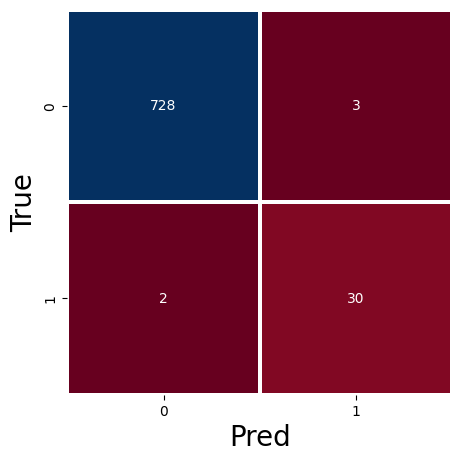

acc = 0.9934469200524246
precision = 0.9090909090909091
TPR = 0.9375
FAR = 0.004103967168262654
FRR = 0.0625
average acc = 0.987859557149755
average precision = 0.8656148092403689
average TPR = 0.9155663088344704
average FAR = 0.008152190206128784
average FRR = 0.08443369116552968
average EER = 0.004103967168262654


In [8]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    DT = DecisionTreeClassifier(criterion='entropy')
    DT.fit(X_re,y_re)
    
    y_pred = DT.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, y_test.astype('int'), y_pred)

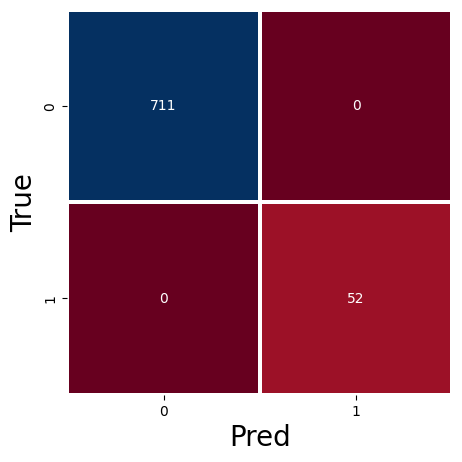

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


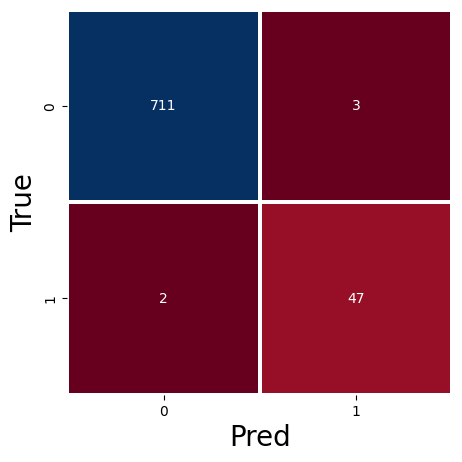

acc = 0.9934469200524246
precision = 0.94
TPR = 0.9591836734693877
FAR = 0.004201680672268907
FRR = 0.04081632653061224


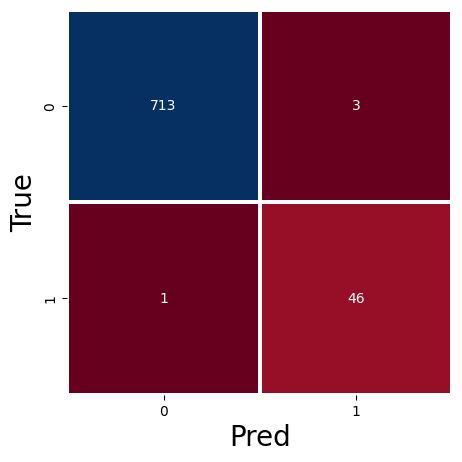

acc = 0.9947575360419397
precision = 0.9387755102040817
TPR = 0.9787234042553191
FAR = 0.004189944134078212
FRR = 0.02127659574468085


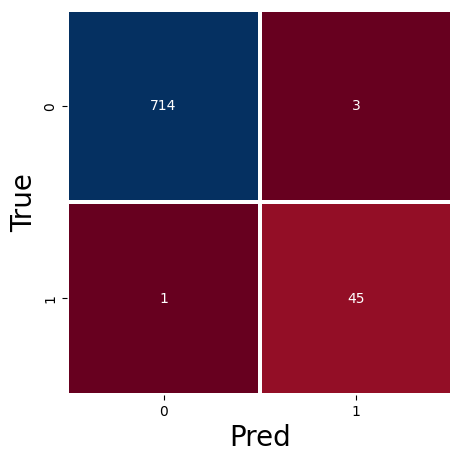

acc = 0.9947575360419397
precision = 0.9375
TPR = 0.9782608695652174
FAR = 0.0041841004184100415
FRR = 0.021739130434782608


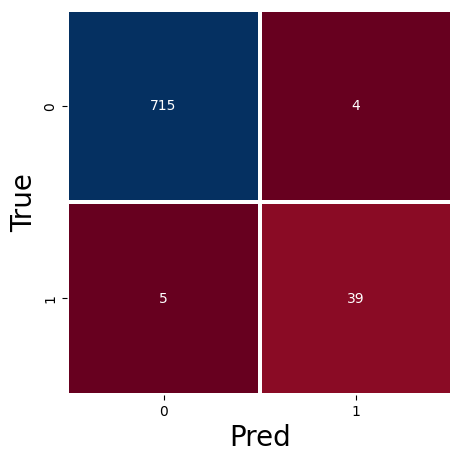

acc = 0.9882044560943644
precision = 0.9069767441860465
TPR = 0.8863636363636364
FAR = 0.005563282336578581
FRR = 0.11363636363636363


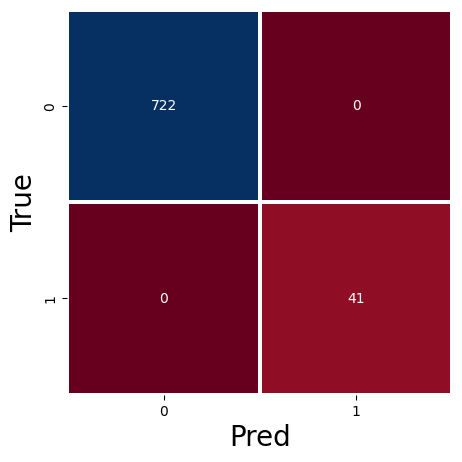

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


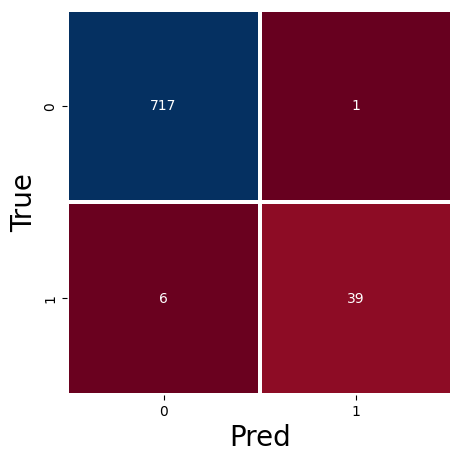

acc = 0.9908256880733946
precision = 0.975
TPR = 0.8666666666666667
FAR = 0.001392757660167131
FRR = 0.13333333333333333


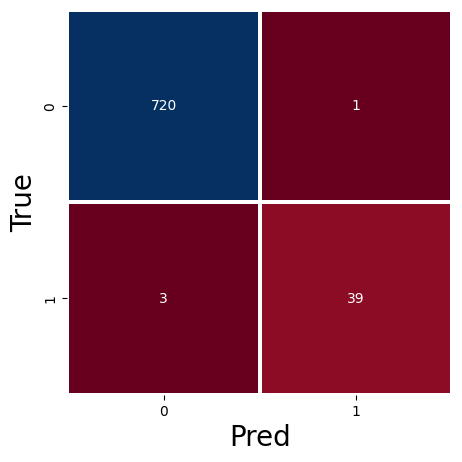

acc = 0.9947575360419397
precision = 0.975
TPR = 0.9285714285714286
FAR = 0.0013869625520110957
FRR = 0.07142857142857142


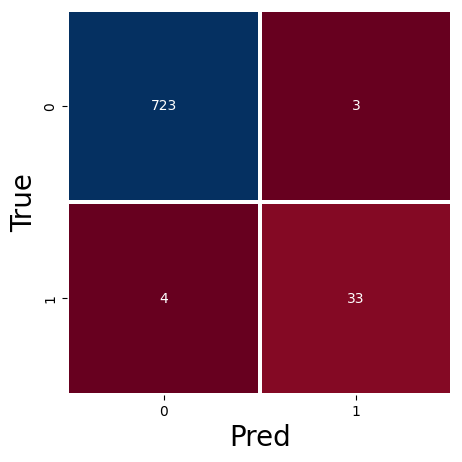

acc = 0.9908256880733946
precision = 0.9166666666666666
TPR = 0.8918918918918919
FAR = 0.004132231404958678
FRR = 0.10810810810810811


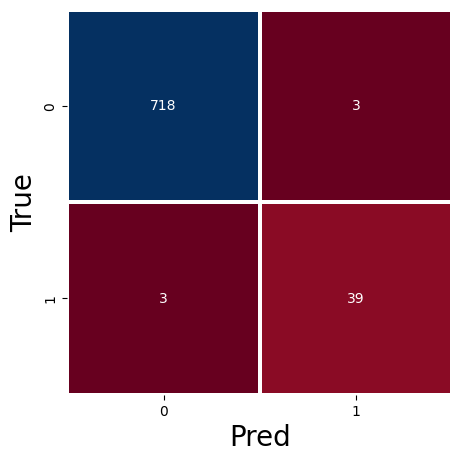

acc = 0.9921363040629095
precision = 0.9285714285714286
TPR = 0.9285714285714286
FAR = 0.004160887656033287
FRR = 0.07142857142857142


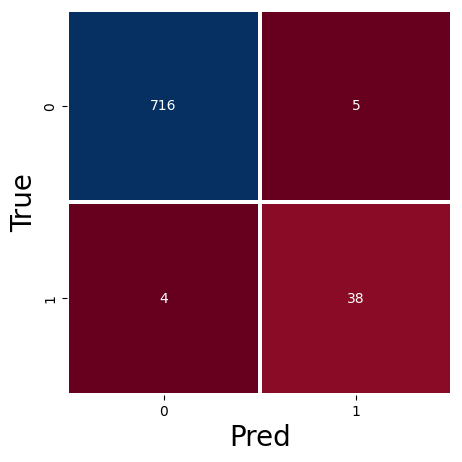

acc = 0.9882044560943644
precision = 0.8837209302325582
TPR = 0.9047619047619048
FAR = 0.006934812760055479
FRR = 0.09523809523809523


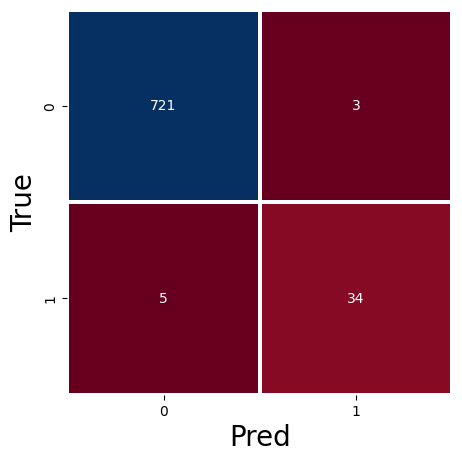

acc = 0.9895150720838795
precision = 0.918918918918919
TPR = 0.8717948717948718
FAR = 0.004143646408839779
FRR = 0.1282051282051282


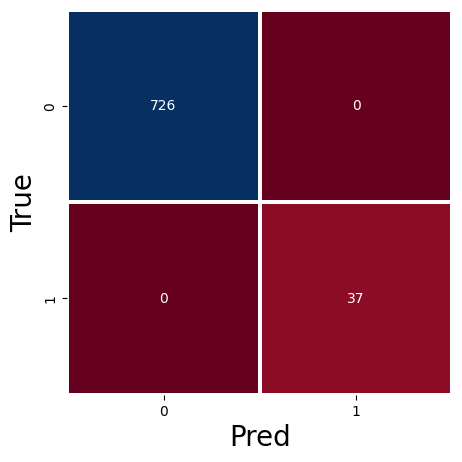

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


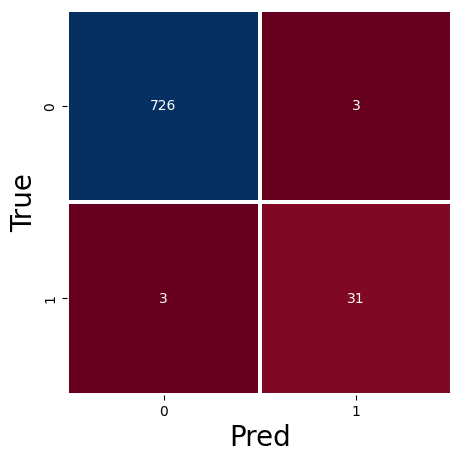

acc = 0.9921363040629095
precision = 0.9117647058823529
TPR = 0.9117647058823529
FAR = 0.00411522633744856
FRR = 0.08823529411764706


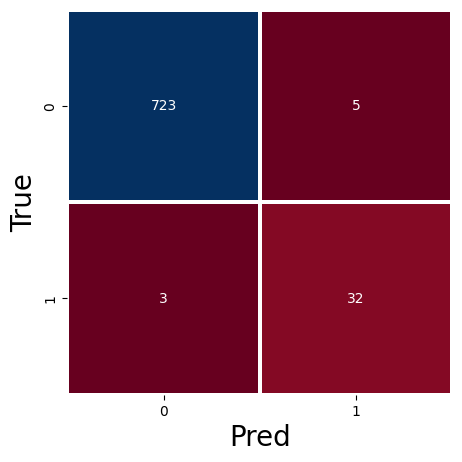

acc = 0.9895150720838795
precision = 0.8648648648648649
TPR = 0.9142857142857143
FAR = 0.006868131868131868
FRR = 0.08571428571428572


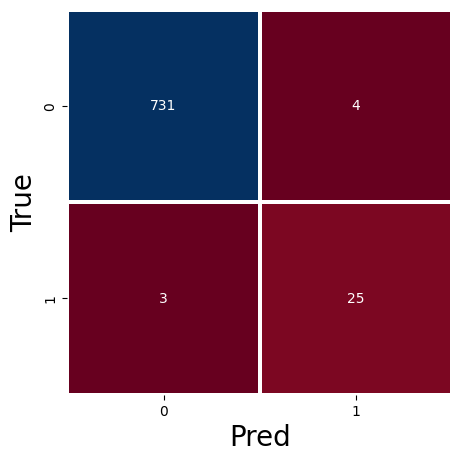

acc = 0.9908256880733946
precision = 0.8620689655172413
TPR = 0.8928571428571429
FAR = 0.005442176870748299
FRR = 0.10714285714285714


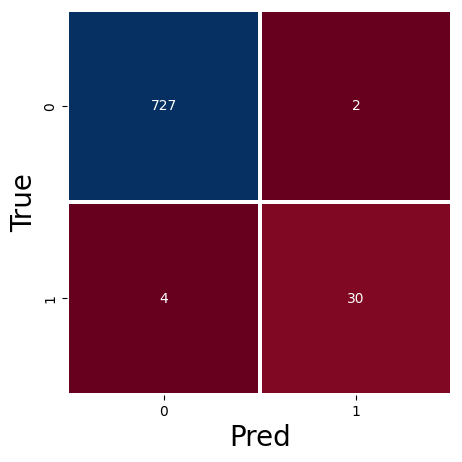

acc = 0.9921363040629095
precision = 0.9375
TPR = 0.8823529411764706
FAR = 0.0027434842249657062
FRR = 0.11764705882352941


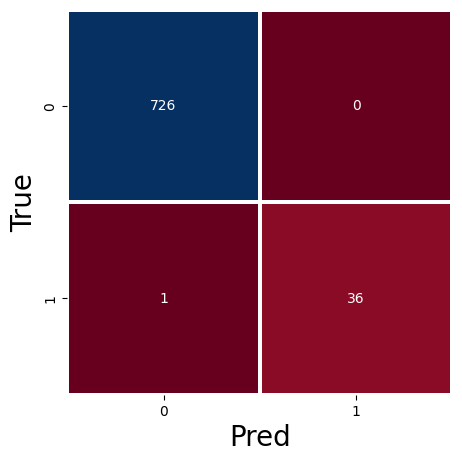

acc = 0.9986893840104849
precision = 1.0
TPR = 0.972972972972973
FAR = 0.0
FRR = 0.02702702702702703


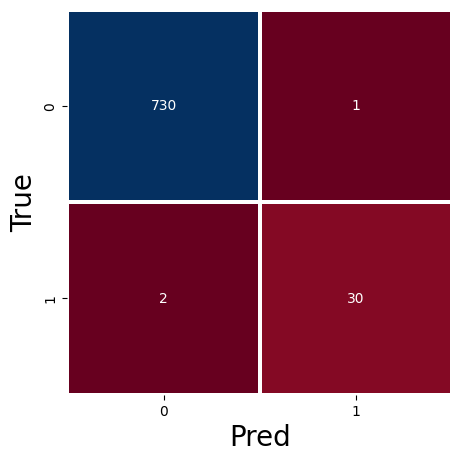

acc = 0.9960681520314548
precision = 0.967741935483871
TPR = 0.9375
FAR = 0.0013679890560875513
FRR = 0.0625
average acc = 0.9935158998413466
average precision = 0.9402668773962123
average TPR = 0.9319222764782319
average FAR = 0.0032014375979359565
average FRR = 0.06807772352176808
average EER = 0.0013679890560875513


In [9]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    RF = RandomForestClassifier(n_estimators=22)
    RF.fit(X_re,y_re)
    
    y_pred = RF.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, y_test.astype('int'), y_pred)

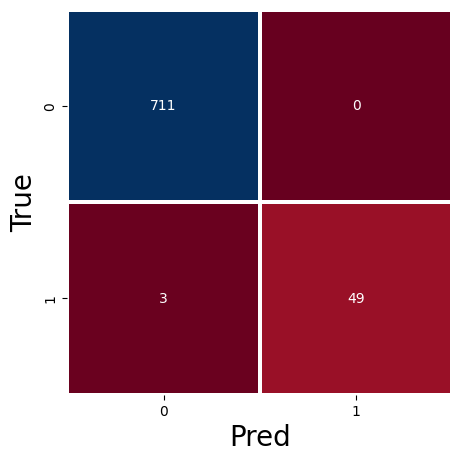

acc = 0.9960681520314548
precision = 1.0
TPR = 0.9423076923076923
FAR = 0.0
FRR = 0.057692307692307696


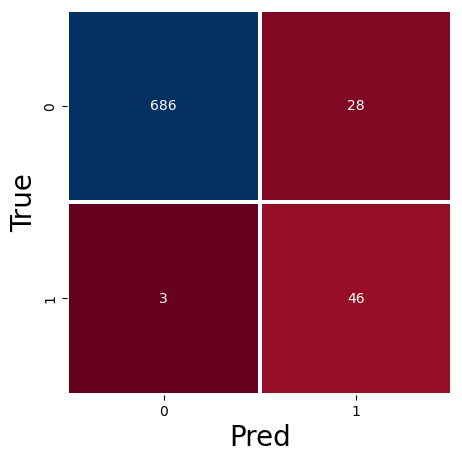

acc = 0.9593709043250328
precision = 0.6216216216216216
TPR = 0.9387755102040817
FAR = 0.0392156862745098
FRR = 0.061224489795918366


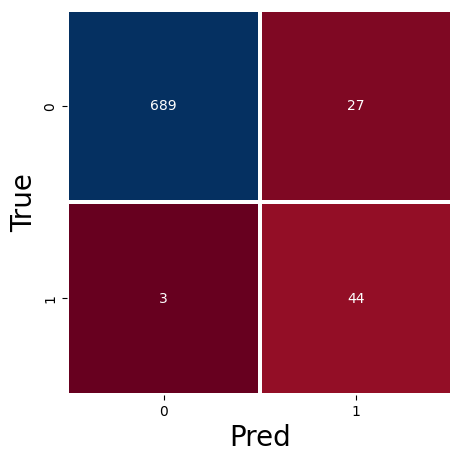

acc = 0.9606815203145478
precision = 0.6197183098591549
TPR = 0.9361702127659575
FAR = 0.03770949720670391
FRR = 0.06382978723404255


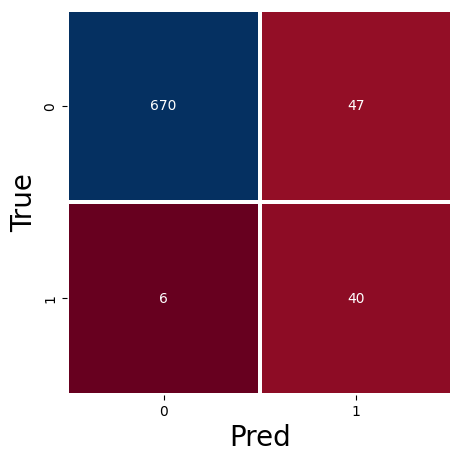

acc = 0.9305373525557011
precision = 0.45977011494252873
TPR = 0.8695652173913043
FAR = 0.06555090655509066
FRR = 0.13043478260869565


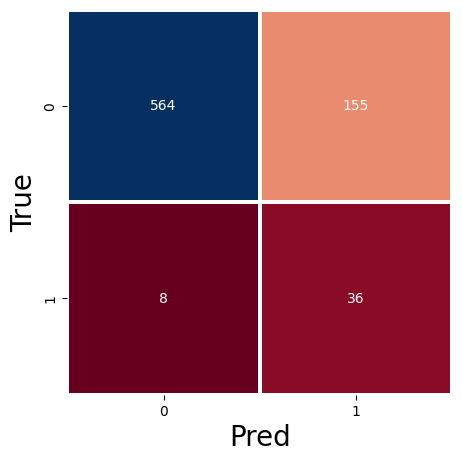

acc = 0.7863695937090432
precision = 0.18848167539267016
TPR = 0.8181818181818182
FAR = 0.21557719054242003
FRR = 0.18181818181818182


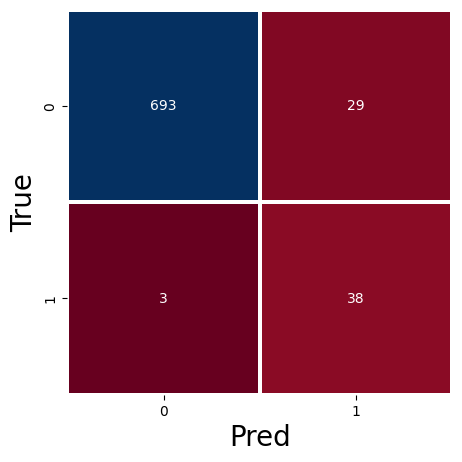

acc = 0.9580602883355177
precision = 0.5671641791044776
TPR = 0.926829268292683
FAR = 0.04016620498614958
FRR = 0.07317073170731707


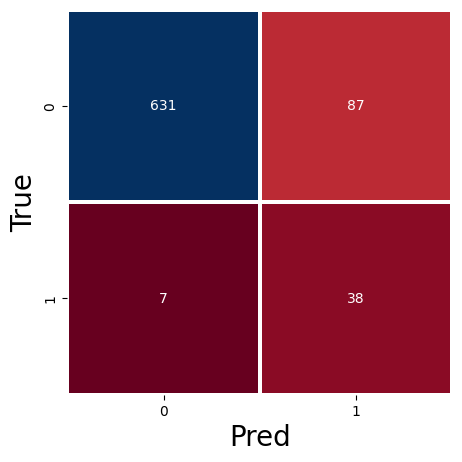

acc = 0.8768020969855832
precision = 0.304
TPR = 0.8444444444444444
FAR = 0.12116991643454039
FRR = 0.15555555555555556


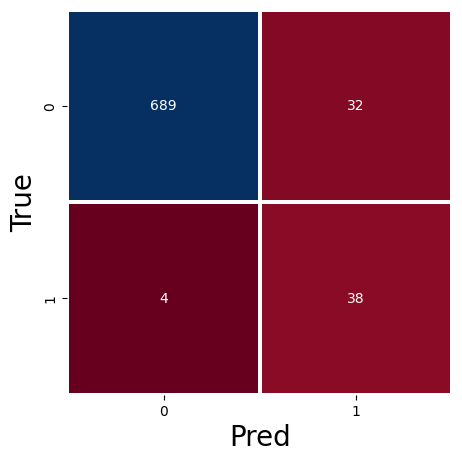

acc = 0.9528178243774574
precision = 0.5428571428571428
TPR = 0.9047619047619048
FAR = 0.044382801664355064
FRR = 0.09523809523809523


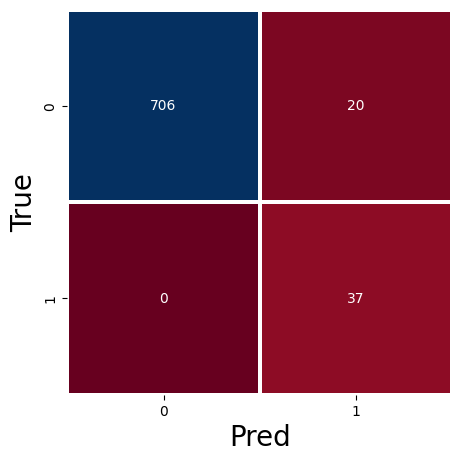

acc = 0.9737876802096985
precision = 0.6491228070175439
TPR = 1.0
FAR = 0.027548209366391185
FRR = 0.0


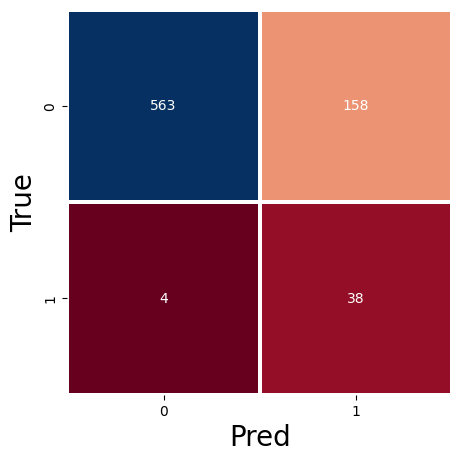

acc = 0.7876802096985583
precision = 0.19387755102040816
TPR = 0.9047619047619048
FAR = 0.21914008321775313
FRR = 0.09523809523809523


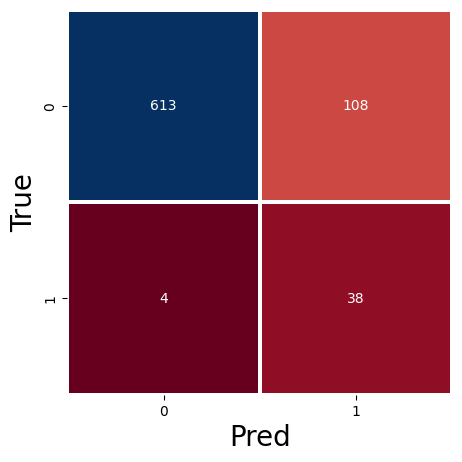

acc = 0.8532110091743119
precision = 0.2602739726027397
TPR = 0.9047619047619048
FAR = 0.14979195561719832
FRR = 0.09523809523809523


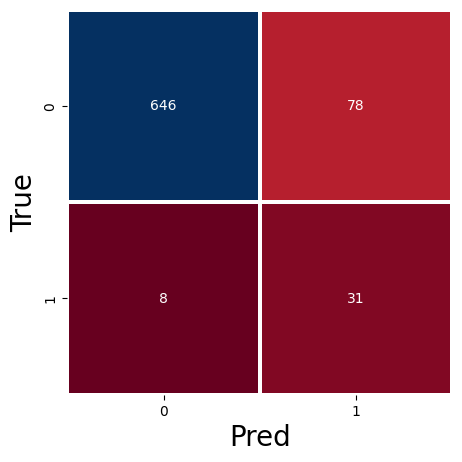

acc = 0.8872870249017037
precision = 0.28440366972477066
TPR = 0.7948717948717948
FAR = 0.10773480662983426
FRR = 0.20512820512820512


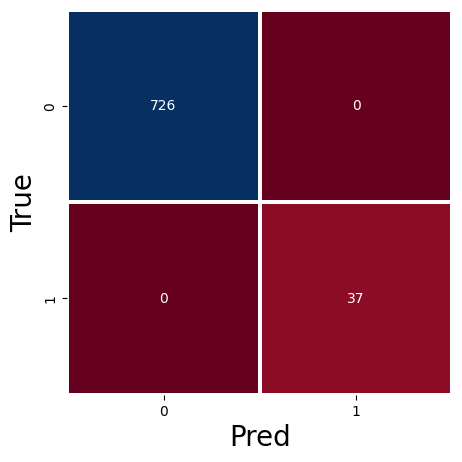

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


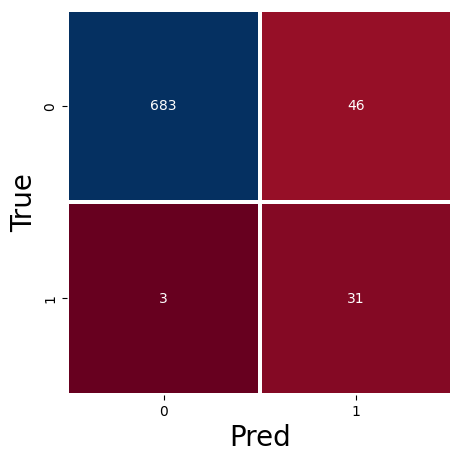

acc = 0.9357798165137615
precision = 0.4025974025974026
TPR = 0.9117647058823529
FAR = 0.06310013717421124
FRR = 0.08823529411764706


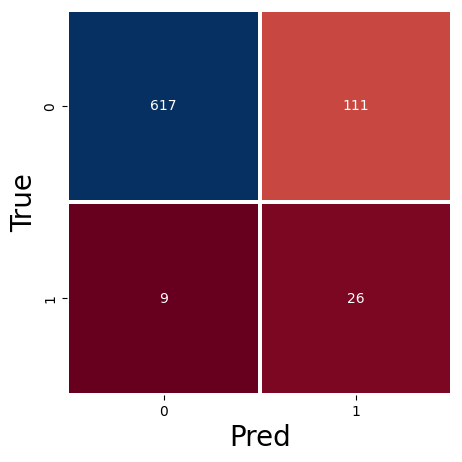

acc = 0.8427260812581914
precision = 0.1897810218978102
TPR = 0.7428571428571429
FAR = 0.15247252747252749
FRR = 0.2571428571428571


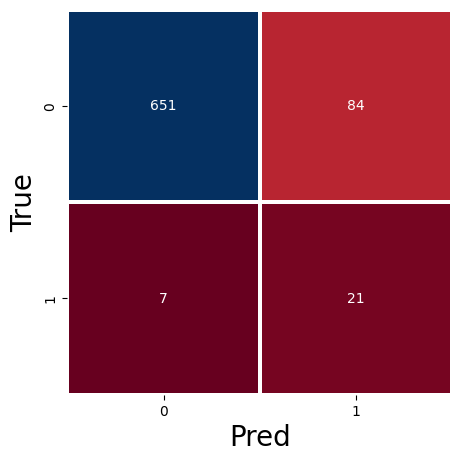

acc = 0.8807339449541285
precision = 0.2
TPR = 0.75
FAR = 0.11428571428571428
FRR = 0.25


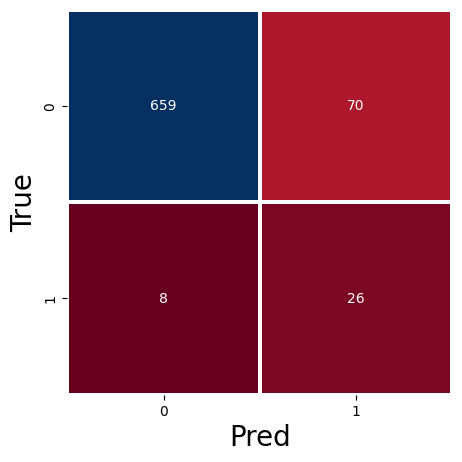

acc = 0.8977719528178244
precision = 0.2708333333333333
TPR = 0.7647058823529411
FAR = 0.09602194787379972
FRR = 0.23529411764705882


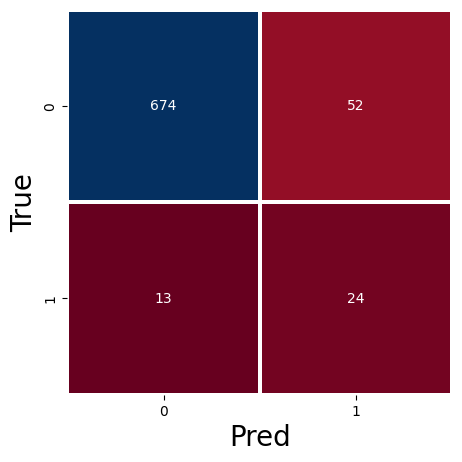

acc = 0.9148099606815203
precision = 0.3157894736842105
TPR = 0.6486486486486487
FAR = 0.07162534435261708
FRR = 0.35135135135135137


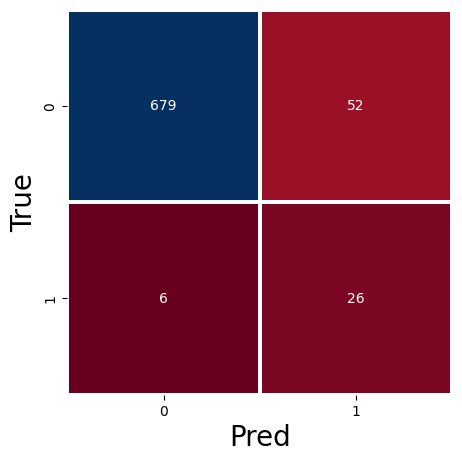

acc = 0.9239842726081258
precision = 0.3333333333333333
TPR = 0.8125
FAR = 0.07113543091655267
FRR = 0.1875
average acc = 0.911498930813272
average precision = 0.4422960846836394
average TPR = 0.8639951606571884
average FAR = 0.08613833476686153
average FRR = 0.13600483934281177
average EER = 0.07113543091655267


In [10]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    GNB = GaussianNB()
    GNB.fit(X_re,y_re)
    
    y_pred = GNB.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, y_test.astype('int'), y_pred)

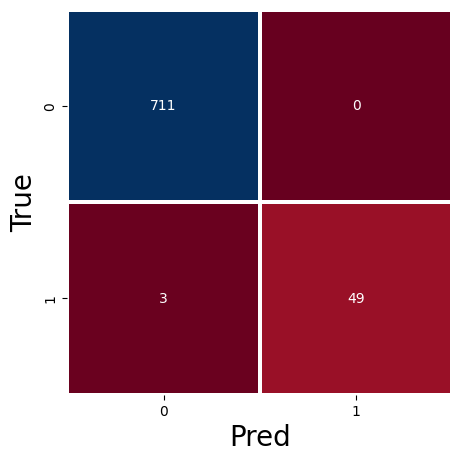

acc = 0.9960681520314548
precision = 1.0
TPR = 0.9423076923076923
FAR = 0.0
FRR = 0.057692307692307696


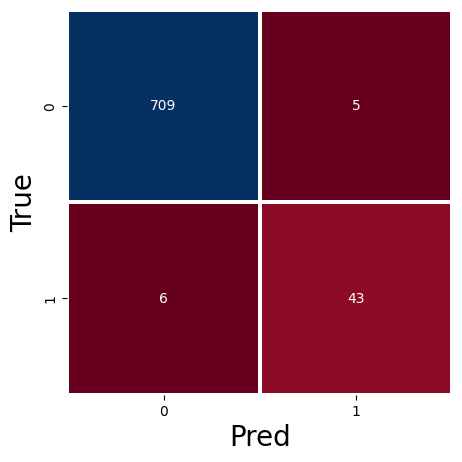

acc = 0.9855832241153342
precision = 0.8958333333333334
TPR = 0.8775510204081632
FAR = 0.0070028011204481795
FRR = 0.12244897959183673


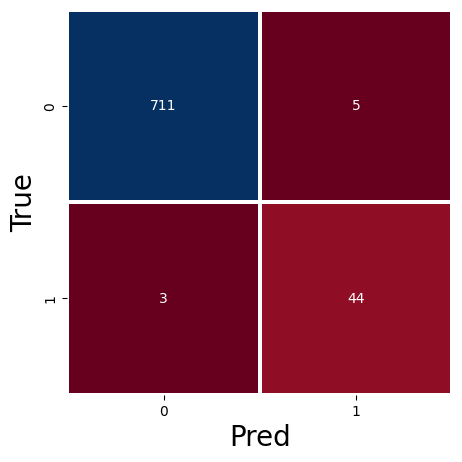

acc = 0.9895150720838795
precision = 0.8979591836734694
TPR = 0.9361702127659575
FAR = 0.006983240223463687
FRR = 0.06382978723404255


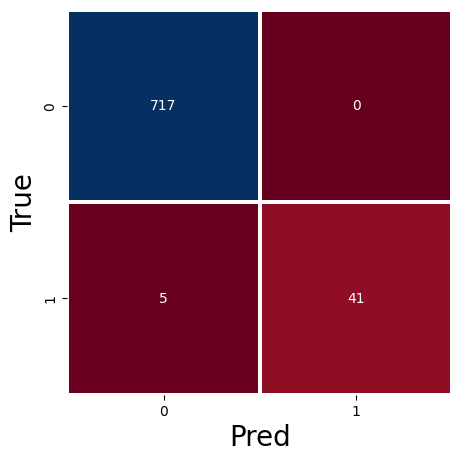

acc = 0.9934469200524246
precision = 1.0
TPR = 0.8913043478260869
FAR = 0.0
FRR = 0.10869565217391304


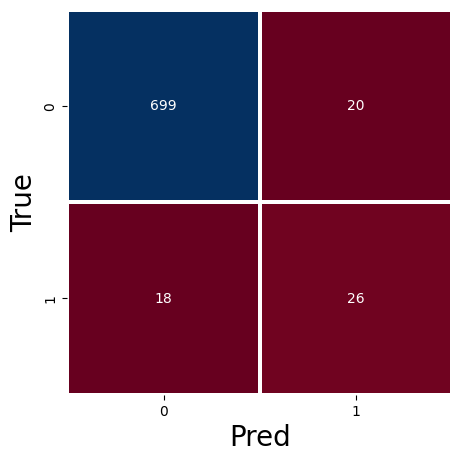

acc = 0.9501965923984272
precision = 0.5652173913043478
TPR = 0.5909090909090909
FAR = 0.027816411682892908
FRR = 0.4090909090909091


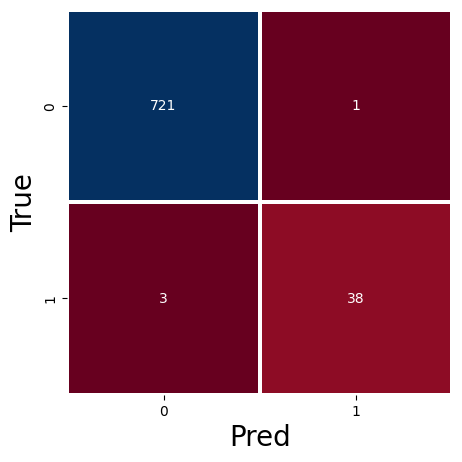

acc = 0.9947575360419397
precision = 0.9743589743589743
TPR = 0.926829268292683
FAR = 0.0013850415512465374
FRR = 0.07317073170731707


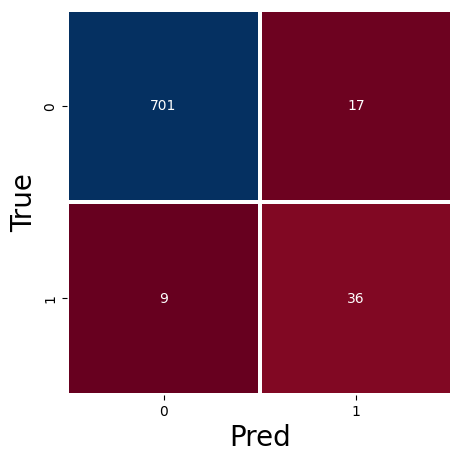

acc = 0.9659239842726082
precision = 0.6792452830188679
TPR = 0.8
FAR = 0.023676880222841225
FRR = 0.2


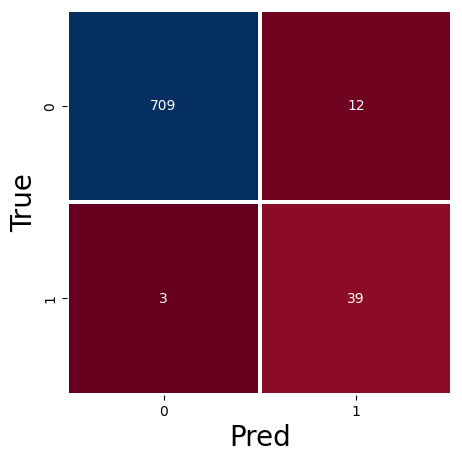

acc = 0.9803407601572739
precision = 0.7647058823529411
TPR = 0.9285714285714286
FAR = 0.016643550624133148
FRR = 0.07142857142857142


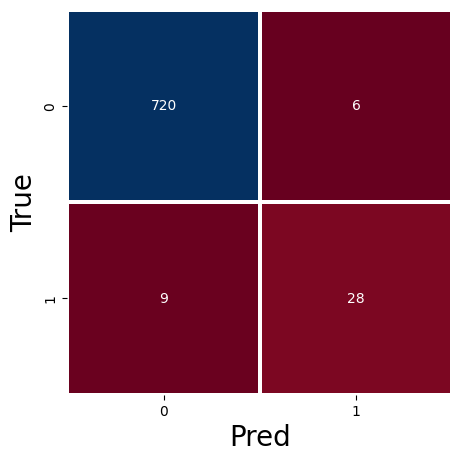

acc = 0.9803407601572739
precision = 0.8235294117647058
TPR = 0.7567567567567568
FAR = 0.008264462809917356
FRR = 0.24324324324324326


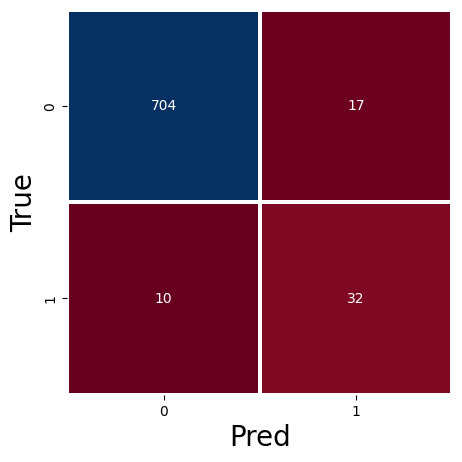

acc = 0.9646133682830931
precision = 0.6530612244897959
TPR = 0.7619047619047619
FAR = 0.023578363384188627
FRR = 0.23809523809523808


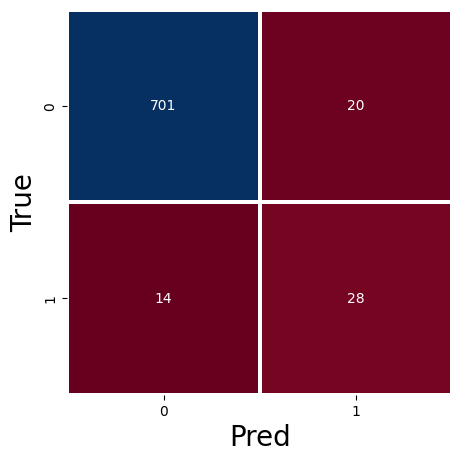

acc = 0.9554390563564875
precision = 0.5833333333333334
TPR = 0.6666666666666666
FAR = 0.027739251040221916
FRR = 0.3333333333333333


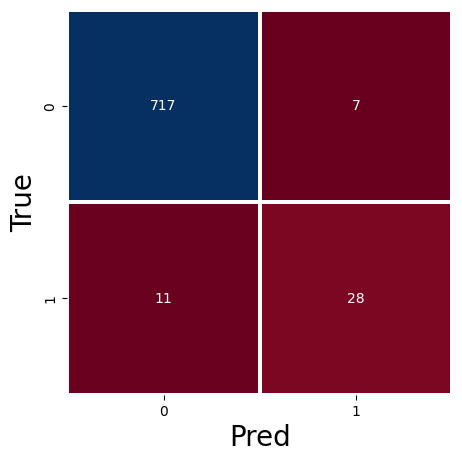

acc = 0.9764089121887287
precision = 0.8
TPR = 0.717948717948718
FAR = 0.009668508287292817
FRR = 0.28205128205128205


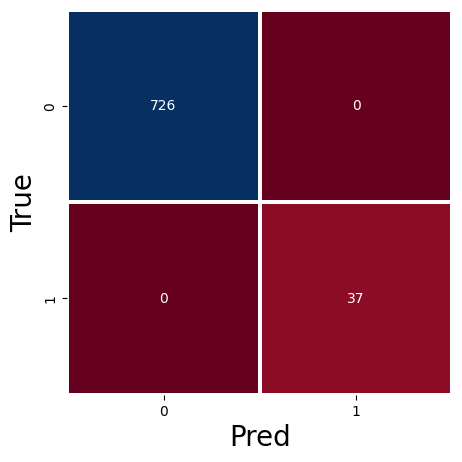

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


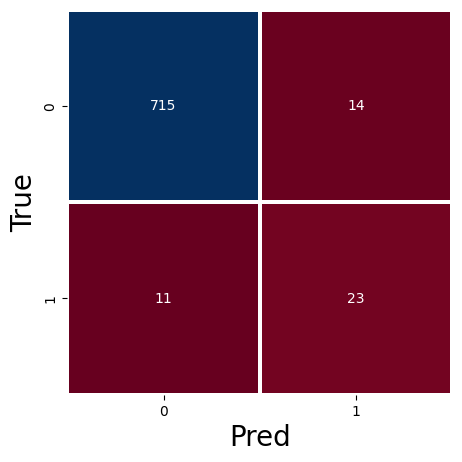

acc = 0.9672346002621232
precision = 0.6216216216216216
TPR = 0.6764705882352942
FAR = 0.019204389574759947
FRR = 0.3235294117647059


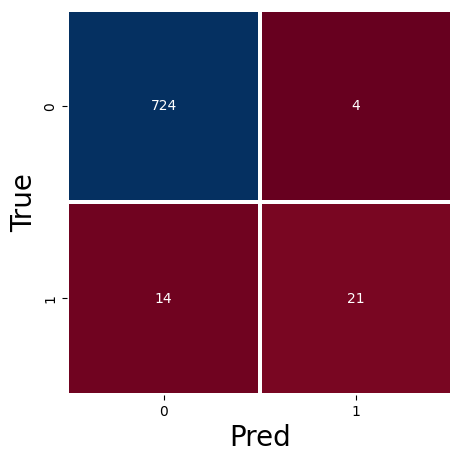

acc = 0.9764089121887287
precision = 0.84
TPR = 0.6
FAR = 0.005494505494505495
FRR = 0.4


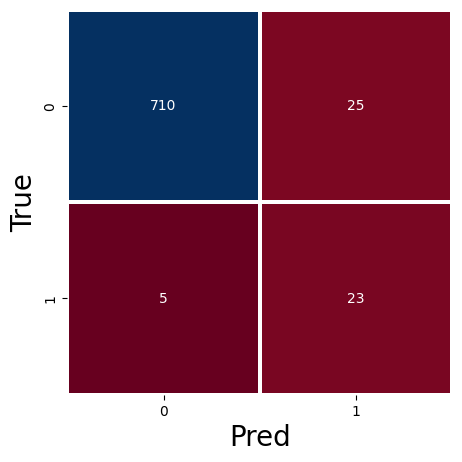

acc = 0.9606815203145478
precision = 0.4791666666666667
TPR = 0.8214285714285714
FAR = 0.034013605442176874
FRR = 0.17857142857142858


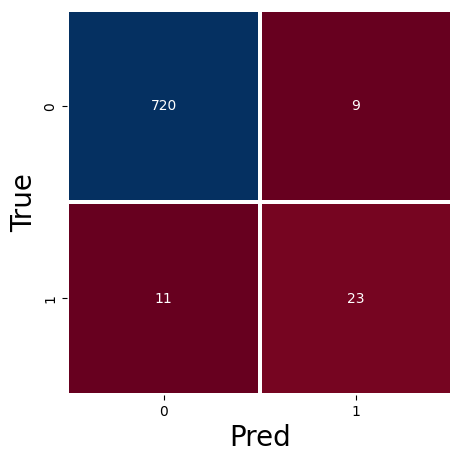

acc = 0.9737876802096985
precision = 0.71875
TPR = 0.6764705882352942
FAR = 0.012345679012345678
FRR = 0.3235294117647059


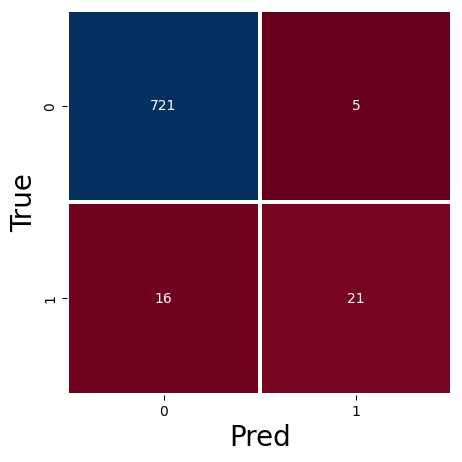

acc = 0.9724770642201835
precision = 0.8076923076923077
TPR = 0.5675675675675675
FAR = 0.006887052341597796
FRR = 0.43243243243243246


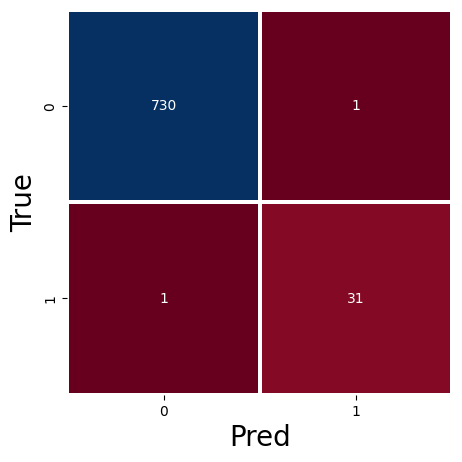

acc = 0.9973787680209698
precision = 0.96875
TPR = 0.96875
FAR = 0.0013679890560875513
FRR = 0.03125
average acc = 0.9779264675450093
average precision = 0.7933276112426508
average TPR = 0.7951372252539332
average FAR = 0.01221430167726946
average FRR = 0.20486277474606668
average EER = 0.0013679890560875513


In [11]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    clf1 = svm.SVC(kernel='rbf', C=10)
    clf2 = MLPClassifier(hidden_layer_sizes=(100,10))
    voting_clf1 = VotingClassifier(estimators=[('svm', clf1), ('mlp', clf2)], voting='hard')
    
    voting_clf1.fit(X_re,y_re)
    
    y_pred = voting_clf1.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, y_test.astype('int'), y_pred)

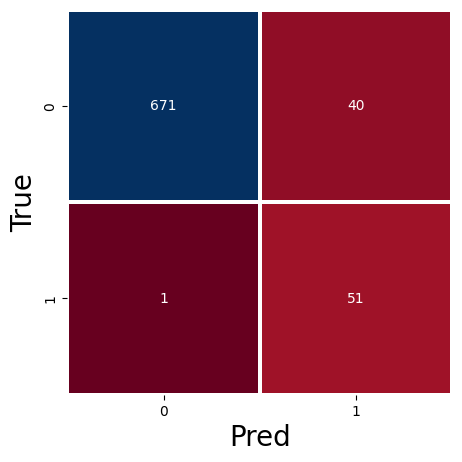

acc = 0.9462647444298821
precision = 0.5604395604395604
TPR = 0.9807692307692307
FAR = 0.05625879043600562
FRR = 0.019230769230769232


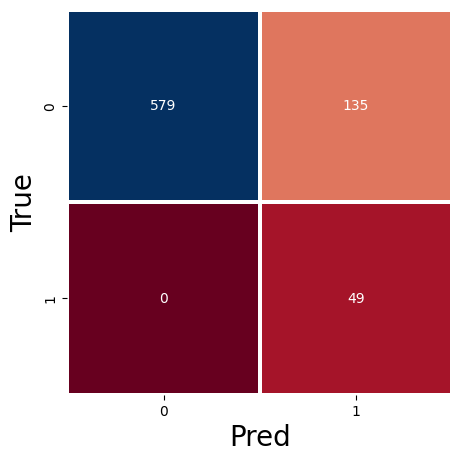

acc = 0.8230668414154653
precision = 0.266304347826087
TPR = 1.0
FAR = 0.18907563025210083
FRR = 0.0


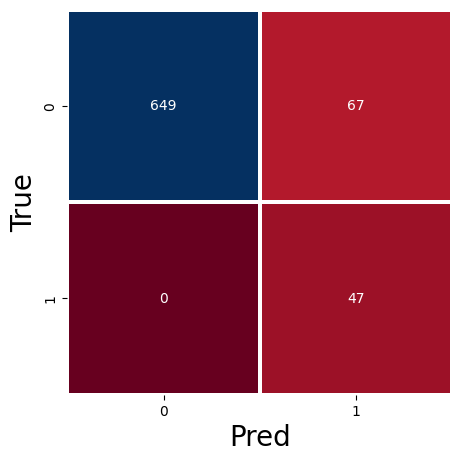

acc = 0.9121887287024901
precision = 0.41228070175438597
TPR = 1.0
FAR = 0.0935754189944134
FRR = 0.0


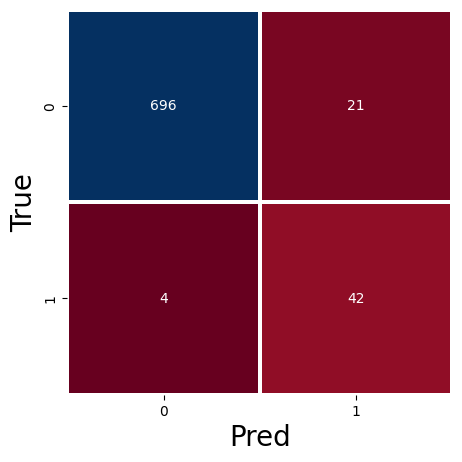

acc = 0.9672346002621232
precision = 0.6666666666666666
TPR = 0.9130434782608695
FAR = 0.029288702928870293
FRR = 0.08695652173913043


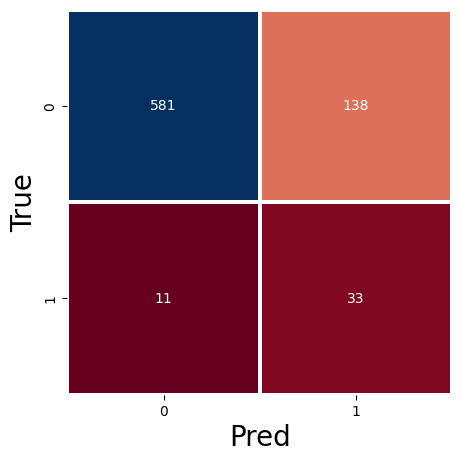

acc = 0.8047182175622543
precision = 0.19298245614035087
TPR = 0.75
FAR = 0.19193324061196107
FRR = 0.25


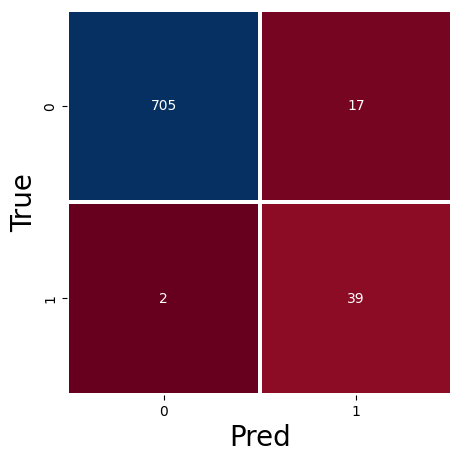

acc = 0.9750982961992136
precision = 0.6964285714285714
TPR = 0.9512195121951219
FAR = 0.023545706371191136
FRR = 0.04878048780487805


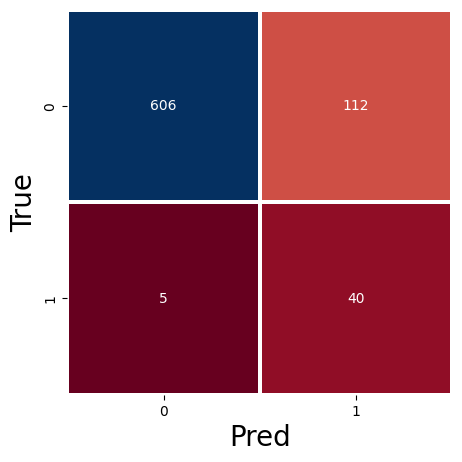

acc = 0.8466579292267365
precision = 0.2631578947368421
TPR = 0.8888888888888888
FAR = 0.15598885793871867
FRR = 0.1111111111111111


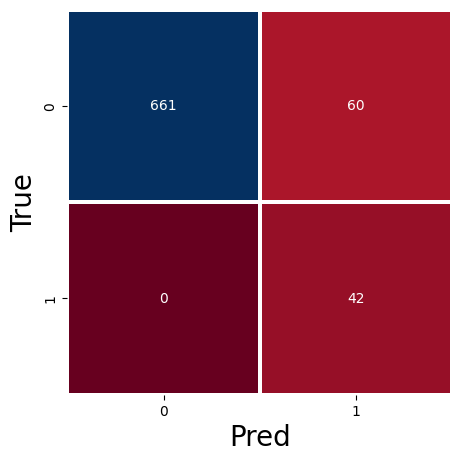

acc = 0.9213630406290957
precision = 0.4117647058823529
TPR = 1.0
FAR = 0.08321775312066575
FRR = 0.0


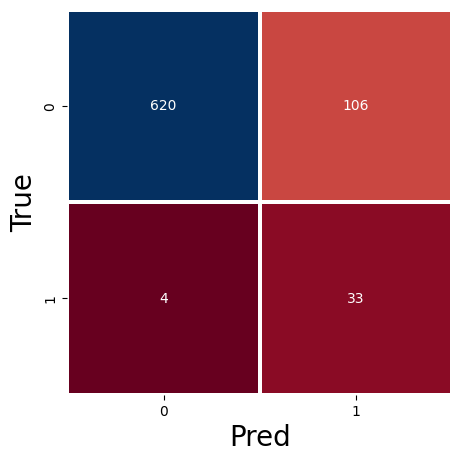

acc = 0.8558322411533421
precision = 0.23741007194244604
TPR = 0.8918918918918919
FAR = 0.14600550964187328
FRR = 0.10810810810810811


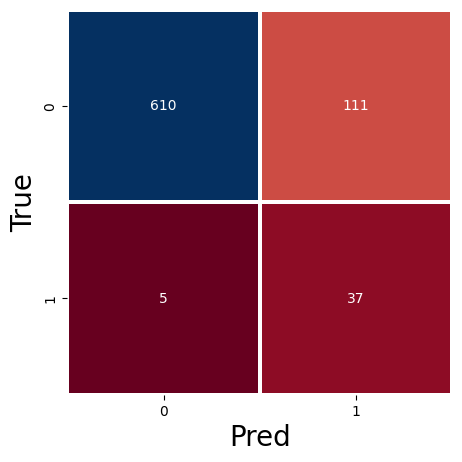

acc = 0.8479685452162516
precision = 0.25
TPR = 0.8809523809523809
FAR = 0.1539528432732316
FRR = 0.11904761904761904


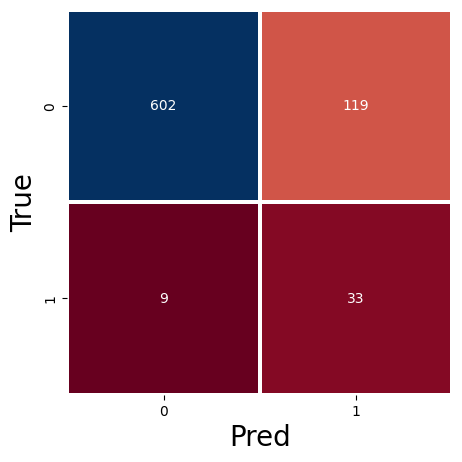

acc = 0.8322411533420708
precision = 0.21710526315789475
TPR = 0.7857142857142857
FAR = 0.1650485436893204
FRR = 0.21428571428571427


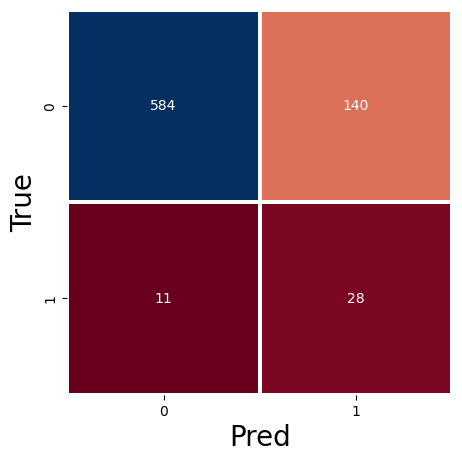

acc = 0.8020969855832241
precision = 0.16666666666666666
TPR = 0.717948717948718
FAR = 0.19337016574585636
FRR = 0.28205128205128205


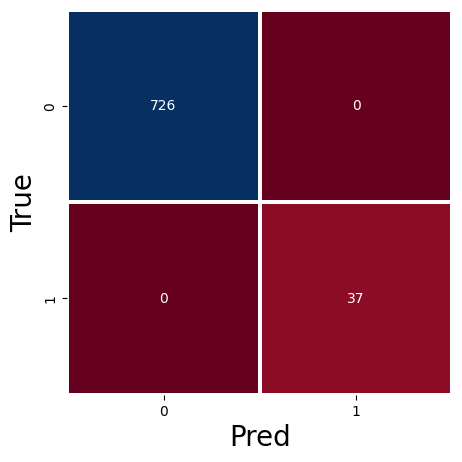

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


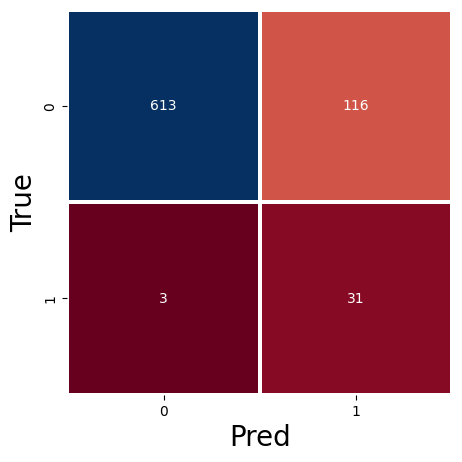

acc = 0.8440366972477065
precision = 0.2108843537414966
TPR = 0.9117647058823529
FAR = 0.15912208504801098
FRR = 0.08823529411764706


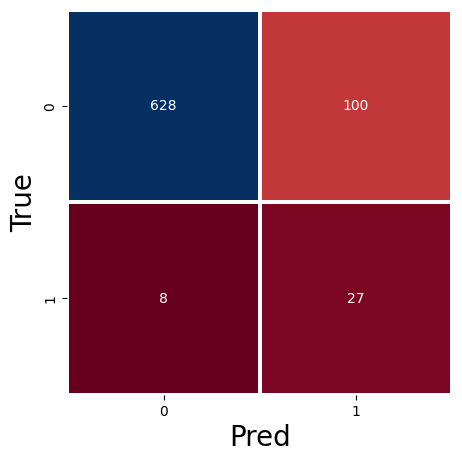

acc = 0.8584534731323722
precision = 0.2125984251968504
TPR = 0.7714285714285715
FAR = 0.13736263736263737
FRR = 0.22857142857142856


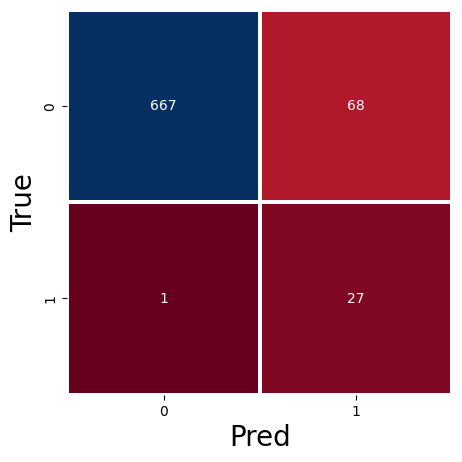

acc = 0.90956749672346
precision = 0.28421052631578947
TPR = 0.9642857142857143
FAR = 0.09251700680272108
FRR = 0.03571428571428571


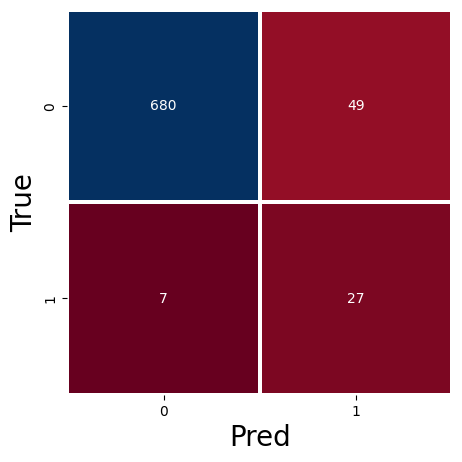

acc = 0.926605504587156
precision = 0.35526315789473684
TPR = 0.7941176470588235
FAR = 0.06721536351165981
FRR = 0.20588235294117646


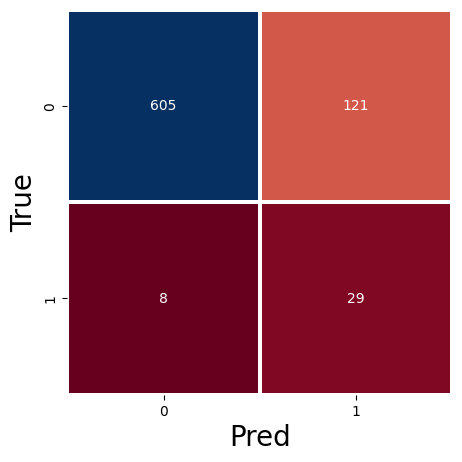

acc = 0.8309305373525557
precision = 0.19333333333333333
TPR = 0.7837837837837838
FAR = 0.16666666666666666
FRR = 0.21621621621621623


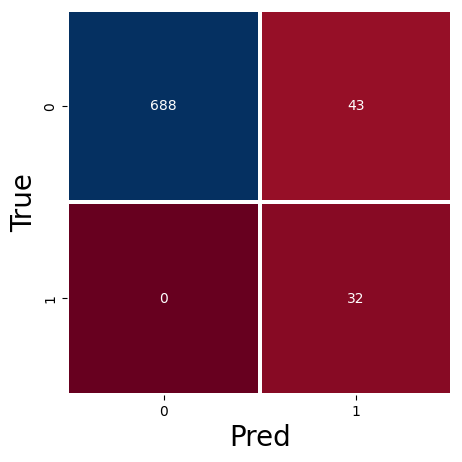

acc = 0.9436435124508519
precision = 0.4266666666666667
TPR = 1.0
FAR = 0.058823529411764705
FRR = 0.0
average acc = 0.8867351865903291
average precision = 0.3696928089363526
average TPR = 0.8939899373189808
average FAR = 0.11384044483198257
average FRR = 0.10601006268101928
average EER = 0.058823529411764705


In [12]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    clf1 = svm.SVC(kernel='poly', C=10)
    clf2 = svm.SVC(kernel='rbf', C=10)
    voting_clf2 = VotingClassifier(estimators=[('svm1', clf1), ('svm2', clf2)], voting='hard')
    
    voting_clf2.fit(X_re,y_re)
    
    y_pred = voting_clf2.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, y_test.astype('int'), y_pred)

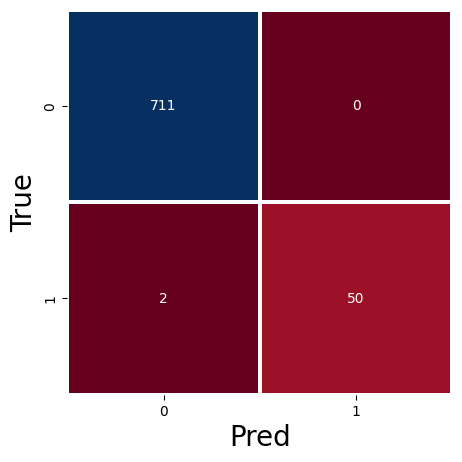

acc = 0.9973787680209698
precision = 1.0
TPR = 0.9615384615384616
FAR = 0.0
FRR = 0.038461538461538464


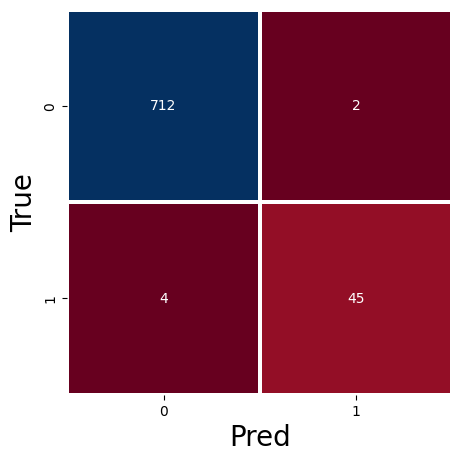

acc = 0.9921363040629095
precision = 0.9574468085106383
TPR = 0.9183673469387755
FAR = 0.0028011204481792717
FRR = 0.08163265306122448


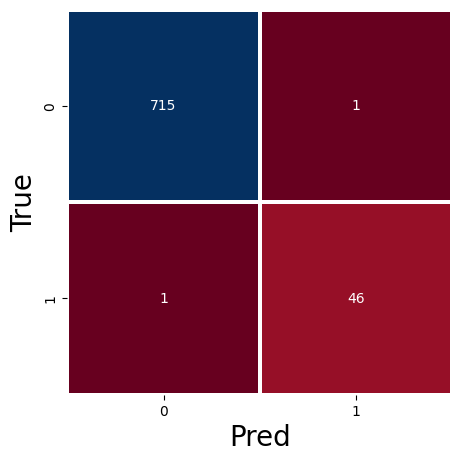

acc = 0.9973787680209698
precision = 0.9787234042553191
TPR = 0.9787234042553191
FAR = 0.0013966480446927375
FRR = 0.02127659574468085


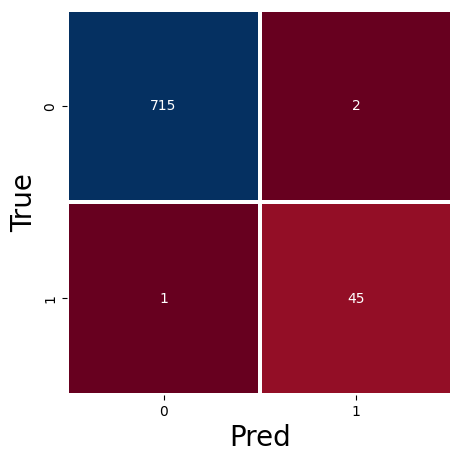

acc = 0.9960681520314548
precision = 0.9574468085106383
TPR = 0.9782608695652174
FAR = 0.002789400278940028
FRR = 0.021739130434782608


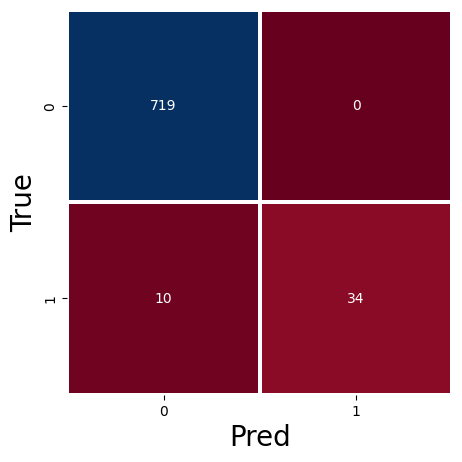

acc = 0.9868938401048493
precision = 1.0
TPR = 0.7727272727272727
FAR = 0.0
FRR = 0.22727272727272727


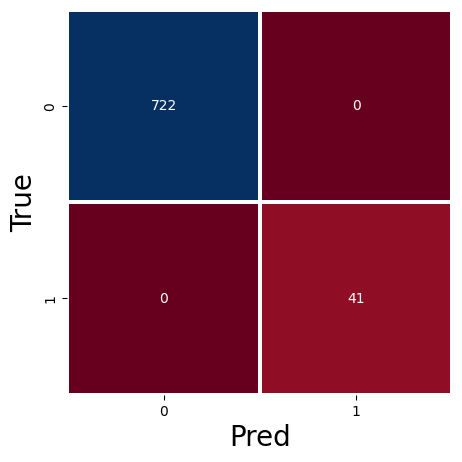

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


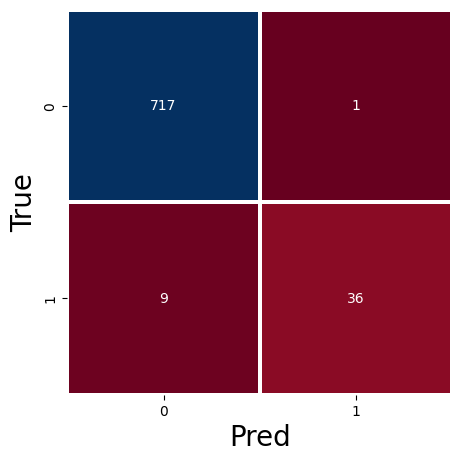

acc = 0.9868938401048493
precision = 0.972972972972973
TPR = 0.8
FAR = 0.001392757660167131
FRR = 0.2


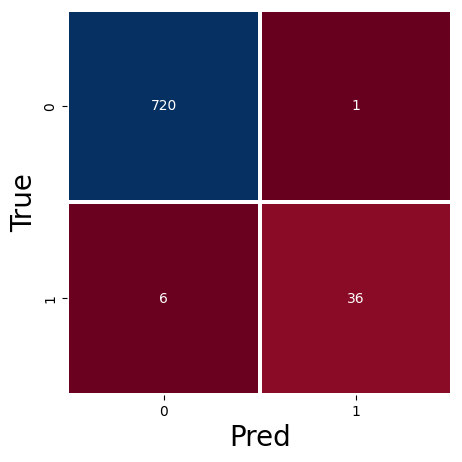

acc = 0.9908256880733946
precision = 0.972972972972973
TPR = 0.8571428571428571
FAR = 0.0013869625520110957
FRR = 0.14285714285714285


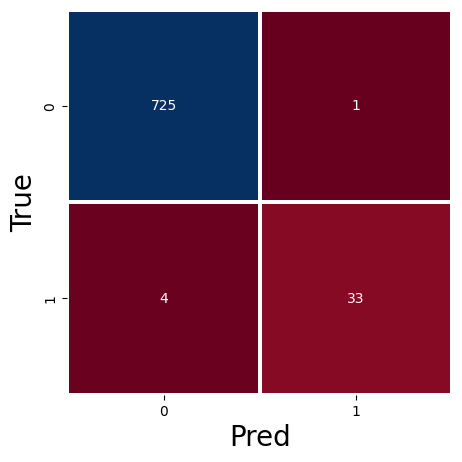

acc = 0.9934469200524246
precision = 0.9705882352941176
TPR = 0.8918918918918919
FAR = 0.0013774104683195593
FRR = 0.10810810810810811


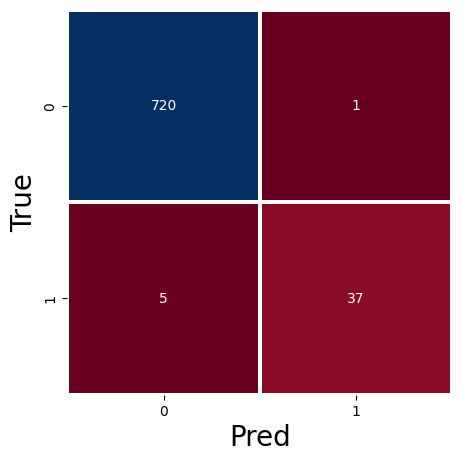

acc = 0.9921363040629095
precision = 0.9736842105263158
TPR = 0.8809523809523809
FAR = 0.0013869625520110957
FRR = 0.11904761904761904


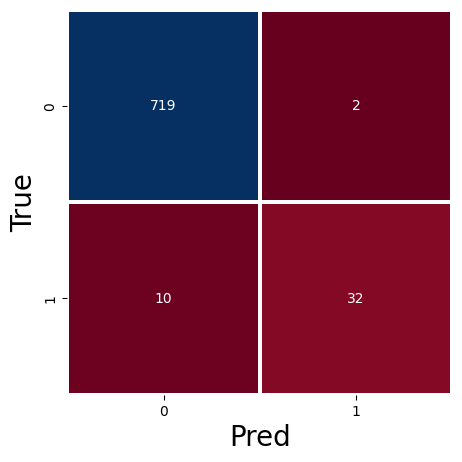

acc = 0.9842726081258192
precision = 0.9411764705882353
TPR = 0.7619047619047619
FAR = 0.0027739251040221915
FRR = 0.23809523809523808


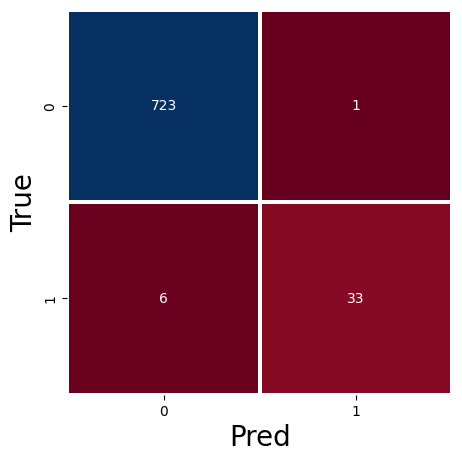

acc = 0.9908256880733946
precision = 0.9705882352941176
TPR = 0.8461538461538461
FAR = 0.0013812154696132596
FRR = 0.15384615384615385


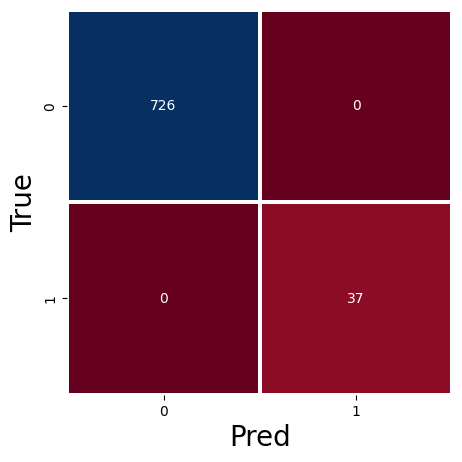

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


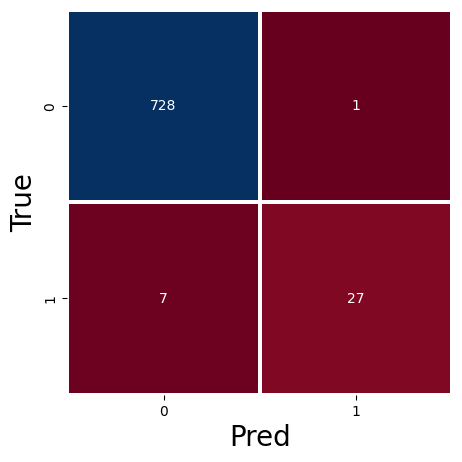

acc = 0.9895150720838795
precision = 0.9642857142857143
TPR = 0.7941176470588235
FAR = 0.0013717421124828531
FRR = 0.20588235294117646


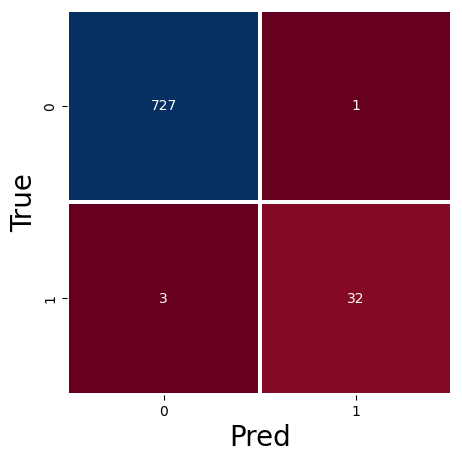

acc = 0.9947575360419397
precision = 0.9696969696969697
TPR = 0.9142857142857143
FAR = 0.0013736263736263737
FRR = 0.08571428571428572


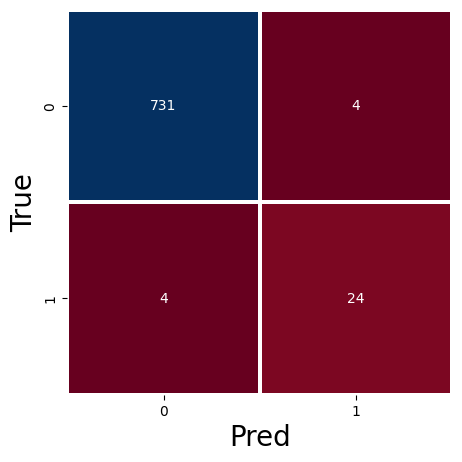

acc = 0.9895150720838795
precision = 0.8571428571428571
TPR = 0.8571428571428571
FAR = 0.005442176870748299
FRR = 0.14285714285714285


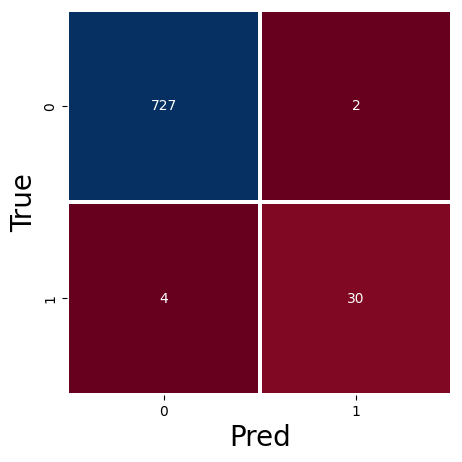

acc = 0.9921363040629095
precision = 0.9375
TPR = 0.8823529411764706
FAR = 0.0027434842249657062
FRR = 0.11764705882352941


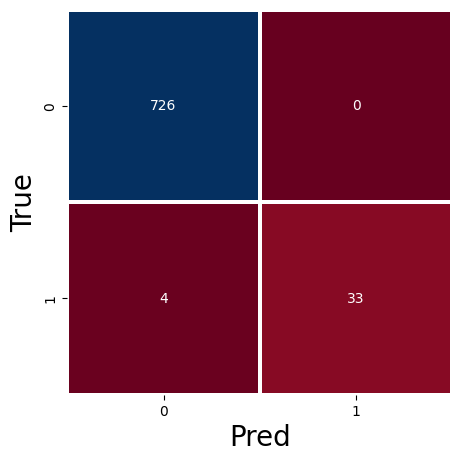

acc = 0.9947575360419397
precision = 1.0
TPR = 0.8918918918918919
FAR = 0.0
FRR = 0.10810810810810811


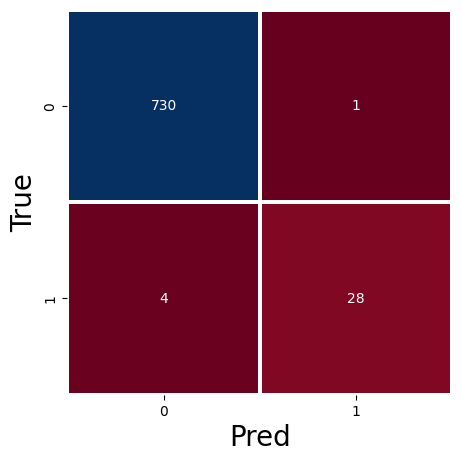

acc = 0.9934469200524246
precision = 0.9655172413793104
TPR = 0.875
FAR = 0.0013679890560875513
FRR = 0.125
average acc = 0.9927571221632063
average precision = 0.9678812053384305
average TPR = 0.8874975865592916
average FAR = 0.0015255484850456393
average FRR = 0.1125024134407083
average EER = 0.0013679890560875513


In [13]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    clf1 = DecisionTreeClassifier(criterion='entropy')
    clf2 = RandomForestClassifier(n_estimators=22)
    voting_clf3 = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2)], voting='hard')
    
    voting_clf3.fit(X_re,y_re)
    
    y_pred = voting_clf3.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, y_test.astype('int'), y_pred)

In [ ]:
print(classification_report(y_test.astype('int'),y_pred))

In [ ]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))